In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import random
import seaborn as sns
%matplotlib inline

# 1.  Data Cleaning

## 1.1 Loading Datasets

In [2]:
df_apps=pd.read_csv('AppleStore.csv')
df_desc=pd.read_csv('appleStore_description.csv')

### Dataset 1: df_apps

df_apps Column Definitions:

- "id" : App ID

- "track_name": App Name

- "size_bytes": Size (in Bytes)

- "currency": Currency Type

- "price": Price amount

- "rating_count_tot": User Rating counts (for all version)

- "rating_count_ver": User Rating counts (for current version)

- "user_rating" : Average User Rating value (for all version)

- "user_rating_ver": Average User Rating value (for current version)

- "ver" : Latest version code

- "cont_rating": Content Rating

- "prime_genre": Primary Genre

- "sup_devices.num": Number of supporting devices

- "ipadSc_urls.num": Number of screenshots showed for display

- "lang.num": Number of supported languages

- "vpp_lic": Vpp Device Based Licensing Enabled

In [3]:
df_apps.head()

Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5          4+         Games   
1          4.0              3.5   8.2.2          4+  Productivity   
2          3.5              4.5   5.0.0          4+       Weather   
3          4.0              4.5  5.10.0         12+      Shopping   
4          4.5              5.0   7.5.1          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
0               38                5        10        1  
1               37                5        23        1  
2               37                5         3        1  
3               37                5         9        1  
4               37                5        45        1

In [4]:
df_apps.shape

(7197, 17)

### Dataset 2: df_desc

df_desc column definitions: 

- id : App ID
- track_name: Application name
- size_bytes: Memory size (in Bytes)
- app_desc: Application description


In [5]:
df_desc.head()

id                                         track_name  size_bytes  \
0  281656475                                    PAC-MAN Premium   100788224   
1  281796108                          Evernote - stay organized   158578688   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
4  282935706                                              Bible    92774400   

                                            app_desc  
0  SAVE 20%, now only $3.99 for a limited time!\n...  
1  Let Evernote change the way you organize your ...  
2  Download the most popular free weather app pow...  
3  The eBay app is the best way to find anything ...  
4  On more than 250 million devices around the wo...

In [6]:
df_desc.shape

(7197, 4)

## 1.2 Checking for Null Values

In [7]:
# checking if there are null values in the df_apps dataset
df_apps.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

There are no null values in dataset 1.

In [8]:
df_apps.index

RangeIndex(start=0, stop=7197, step=1)

In [9]:
# checking if there are null values in the df_desc dataset
df_desc.isnull().sum()

id            0
track_name    0
size_bytes    0
app_desc      0
dtype: int64

There are no null values in dataset 2.

In [10]:
df_desc.index

RangeIndex(start=0, stop=7197, step=1)

## 1.3 Dropping Irrelevent Columns 

In [11]:
#dropping the unnamed index column
df_apps=df_apps.iloc[:,1:]
df_apps.head()

id                                         track_name  size_bytes  \
0  281656475                                    PAC-MAN Premium   100788224   
1  281796108                          Evernote - stay organized   158578688   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
4  282935706                                              Bible    92774400   

  currency  price  rating_count_tot  rating_count_ver  user_rating  \
0      USD   3.99             21292                26          4.0   
1      USD   0.00            161065                26          4.0   
2      USD   0.00            188583              2822          3.5   
3      USD   0.00            262241               649          4.0   
4      USD   0.00            985920              5320          4.5   

   user_rating_ver     ver cont_rating   prime_genre  sup_devices.num  \
0              4.5   6.3.5          4+         Games               38   
1              3.5   8.2.2          4+  Productivity               37   
2              4.5   5.0.0          4+       Weather               37   
3              4.5  5.10.0         12+      Shopping               37   
4              5.0   7.5.1          4+     Reference               37   

   ipadSc_urls.num  lang.num  vpp_lic  
0                5        10        1  
1                5        23        1  
2                5         3        1  
3                5         9        1  
4                5        45        1

In [12]:
df_apps['currency'].unique()

array(['USD'], dtype=object)

In [13]:
# Since the only currency type is USD, the 'currency' column is not needed, so it can be dropped
df_apps.drop(columns=['currency'],inplace=True)
df_apps.head()

id                                         track_name  size_bytes  \
0  281656475                                    PAC-MAN Premium   100788224   
1  281796108                          Evernote - stay organized   158578688   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
4  282935706                                              Bible    92774400   

   price  rating_count_tot  rating_count_ver  user_rating  user_rating_ver  \
0   3.99             21292                26          4.0              4.5   
1   0.00            161065                26          4.0              3.5   
2   0.00            188583              2822          3.5              4.5   
3   0.00            262241               649          4.0              4.5   
4   0.00            985920              5320          4.5              5.0   

      ver cont_rating   prime_genre  sup_devices.num  ipadSc_urls.num  \
0   6.3.5          4+         Games               38                5   
1   8.2.2          4+  Productivity               37                5   
2   5.0.0          4+       Weather               37                5   
3  5.10.0         12+      Shopping               37                5   
4   7.5.1          4+     Reference               37                5   

   lang.num  vpp_lic  
0        10        1  
1        23        1  
2         3        1  
3         9        1  
4        45        1

In [14]:
# Given that the features in this dataset applies to the current version of the app
# We will only be working with ratings and rating counts for the current version
# Therefore, we will drop the 'all_versions' columns.

df_apps.drop(columns=['rating_count_tot','user_rating','ver'],inplace=True)
df_apps.rename(columns={'rating_count_ver':'rating_count','user_rating_ver':'user_rating'},inplace=True)
df_apps.head()

id                                         track_name  size_bytes  \
0  281656475                                    PAC-MAN Premium   100788224   
1  281796108                          Evernote - stay organized   158578688   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
4  282935706                                              Bible    92774400   

   price  rating_count  user_rating cont_rating   prime_genre  \
0   3.99            26          4.5          4+         Games   
1   0.00            26          3.5          4+  Productivity   
2   0.00          2822          4.5          4+       Weather   
3   0.00           649          4.5         12+      Shopping   
4   0.00          5320          5.0          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
0               38                5        10        1  
1               37                5        23        1  
2               37                5         3        1  
3               37                5         9        1  
4               37                5        45        1

## 1.4 Content Rating

In [15]:
# the cont_rating column specifies the age restrictions of the contents
df_apps['cont_rating'].unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

In [16]:
# To make the cont_rating column more clear and concise, it is renamed and adjusted
df_apps.rename(columns={'cont_rating':'age_restrict'},inplace=True)
df_apps['age_restrict']=df_apps['age_restrict'].str[:-1]
df_apps.head()

id                                         track_name  size_bytes  \
0  281656475                                    PAC-MAN Premium   100788224   
1  281796108                          Evernote - stay organized   158578688   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
4  282935706                                              Bible    92774400   

   price  rating_count  user_rating age_restrict   prime_genre  \
0   3.99            26          4.5            4         Games   
1   0.00            26          3.5            4  Productivity   
2   0.00          2822          4.5            4       Weather   
3   0.00           649          4.5           12      Shopping   
4   0.00          5320          5.0            4     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
0               38                5        10        1  
1               37                5        23        1  
2               37                5         3        1  
3               37                5         9        1  
4               37                5        45        1

## 1.5  Bytesize: Unit Conversion

In [17]:
# adding a new column that shows size-bytes in mb
df_apps['size_bytes_mb']=df_apps['size_bytes']/(1024*1024.0)
df_apps.drop(columns=['size_bytes'],inplace=True)
df_apps.head()

id                                         track_name  price  \
0  281656475                                    PAC-MAN Premium   3.99   
1  281796108                          Evernote - stay organized   0.00   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   0.00   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   0.00   
4  282935706                                              Bible   0.00   

   rating_count  user_rating age_restrict   prime_genre  sup_devices.num  \
0            26          4.5            4         Games               38   
1            26          3.5            4  Productivity               37   
2          2822          4.5            4       Weather               37   
3           649          4.5           12      Shopping               37   
4          5320          5.0            4     Reference               37   

   ipadSc_urls.num  lang.num  vpp_lic  size_bytes_mb  
0                5        10        1      96.119141  
1                5        23        1     151.232422  
2                5         3        1      95.867188  
3                5         9        1     122.558594  
4                5        45        1      88.476562

## 1.6 Price: Free/Non-Free Binary Creation 

In [18]:
# 1 if app is free and 0 if not free (Binary)
df_apps['free']=df_apps['price'].apply(lambda x: 1 if x==0 else 0)
df_apps.head()

id                                         track_name  price  \
0  281656475                                    PAC-MAN Premium   3.99   
1  281796108                          Evernote - stay organized   0.00   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   0.00   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   0.00   
4  282935706                                              Bible   0.00   

   rating_count  user_rating age_restrict   prime_genre  sup_devices.num  \
0            26          4.5            4         Games               38   
1            26          3.5            4  Productivity               37   
2          2822          4.5            4       Weather               37   
3           649          4.5           12      Shopping               37   
4          5320          5.0            4     Reference               37   

   ipadSc_urls.num  lang.num  vpp_lic  size_bytes_mb  free  
0                5        10        1      96.119141     0  
1                5        23        1     151.232422     1  
2                5         3        1      95.867188     1  
3                5         9        1     122.558594     1  
4                5        45        1      88.476562     1

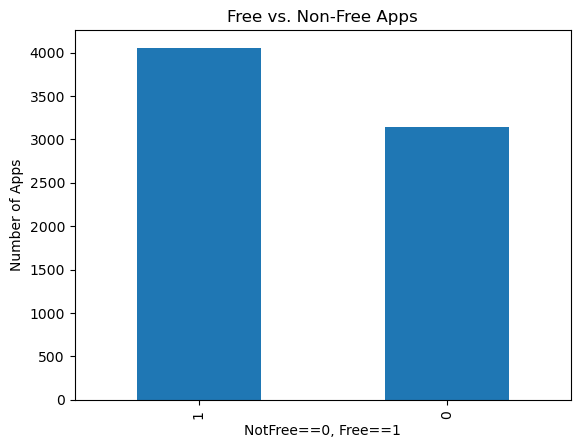

In [19]:
# Checking the distribution of free vs. paid apps
df_apps['free'].value_counts().plot.bar()
plt.title('Free vs. Non-Free Apps')
plt.xlabel('NotFree==0, Free==1')
plt.ylabel('Number of Apps')
plt.show()

There are 4000+ free apps and 3500+ free apps. May be interesting to see if app success depends on whether they are free. 

In [20]:
# making two dataframes for free and non-free apps 
# They will be used in the EDA process
df_nfapps=df_apps[df_apps['free']==0]
df_fapps=df_apps[df_apps['free']==1]

print('There are {} non-free apps in this dataset.'.format(df_nfapps.shape[0]))
print('There are {} free apps in this dataset.'.format(df_fapps.shape[0]))

There are 3141 non-free apps in this dataset.
There are 4056 free apps in this dataset.


## 1.7 Merging Datasets

In [21]:
df_desc.head()

id                                         track_name  size_bytes  \
0  281656475                                    PAC-MAN Premium   100788224   
1  281796108                          Evernote - stay organized   158578688   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
4  282935706                                              Bible    92774400   

                                            app_desc  
0  SAVE 20%, now only $3.99 for a limited time!\n...  
1  Let Evernote change the way you organize your ...  
2  Download the most popular free weather app pow...  
3  The eBay app is the best way to find anything ...  
4  On more than 250 million devices around the wo...

In [22]:
# Before merging df_apps with df_desc, we  drop the duplicate columns from df_desc
df_desc.drop(columns=['track_name','size_bytes'],inplace=True)
df_desc

id                                           app_desc
0      281656475  SAVE 20%, now only $3.99 for a limited time!\n...
1      281796108  Let Evernote change the way you organize your ...
2      281940292  Download the most popular free weather app pow...
3      282614216  The eBay app is the best way to find anything ...
4      282935706  On more than 250 million devices around the wo...
...          ...                                                ...
7192  1187617475  Place the falling blocks correctly in order to...
7193  1187682390  A thrilling virtual reality roller coaster exp...
7194  1187779532  Rock star Bret Michaels, winner of Celebrity A...
7195  1187838770  VR Roller Coaster World is an app for Google C...
7196  1188375727  5 previous escape games plus 1 new game in one...

[7197 rows x 2 columns]

In [23]:
# Merging datasets on the id column
df_apps=df_apps.merge(df_desc,on='id')
df_apps.head()

id                                         track_name  price  \
0  281656475                                    PAC-MAN Premium   3.99   
1  281796108                          Evernote - stay organized   0.00   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   0.00   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   0.00   
4  282935706                                              Bible   0.00   

   rating_count  user_rating age_restrict   prime_genre  sup_devices.num  \
0            26          4.5            4         Games               38   
1            26          3.5            4  Productivity               37   
2          2822          4.5            4       Weather               37   
3           649          4.5           12      Shopping               37   
4          5320          5.0            4     Reference               37   

   ipadSc_urls.num  lang.num  vpp_lic  size_bytes_mb  free  \
0                5        10        1      96.119141     0   
1                5        23        1     151.232422     1   
2                5         3        1      95.867188     1   
3                5         9        1     122.558594     1   
4                5        45        1      88.476562     1   

                                            app_desc  
0  SAVE 20%, now only $3.99 for a limited time!\n...  
1  Let Evernote change the way you organize your ...  
2  Download the most popular free weather app pow...  
3  The eBay app is the best way to find anything ...  
4  On more than 250 million devices around the wo...

In [24]:
# Checking for null values 
df_apps.isnull().sum()

id                 0
track_name         0
price              0
rating_count       0
user_rating        0
age_restrict       0
prime_genre        0
sup_devices.num    0
ipadSc_urls.num    0
lang.num           0
vpp_lic            0
size_bytes_mb      0
free               0
app_desc           0
dtype: int64

In [25]:
# Checking for the shape 
df_apps.shape

(7197, 14)

## 1.8 Data Type Conversions 

In [26]:
# Checking the original data types for each column 
df_apps.dtypes

id                   int64
track_name          object
price              float64
rating_count         int64
user_rating        float64
age_restrict        object
prime_genre         object
sup_devices.num      int64
ipadSc_urls.num      int64
lang.num             int64
vpp_lic              int64
size_bytes_mb      float64
free                 int64
app_desc            object
dtype: object

In [27]:
# Convert age restirctions, prime genre, and free columns into categorical to facilitate analysis
df_apps['age_restrict']=df_apps['age_restrict'].astype('category')
df_apps['prime_genre']=df_apps['prime_genre'].astype('category')
df_apps['free']=df_apps['free'].astype('category')
df_apps.dtypes

id                    int64
track_name           object
price               float64
rating_count          int64
user_rating         float64
age_restrict       category
prime_genre        category
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
size_bytes_mb       float64
free               category
app_desc             object
dtype: object

# 2. Exploratory Data Analysis

## 2.1 Prime Genre Distribution - Free and Paid Apps

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


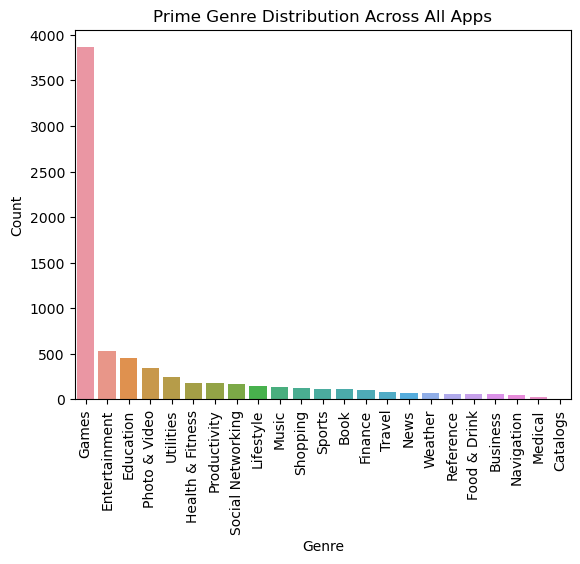

In [28]:
# Count the occurrences and sort them
genre_counts = df_apps['prime_genre'].value_counts().reset_index()
genre_counts.columns = ['prime_genre', 'counts']

# Sort the DataFrame by the counts
genre_counts = genre_counts.sort_values('counts', ascending=False)

# Create the bar plot
sns.barplot(x='prime_genre', y='counts', data=genre_counts, order=genre_counts['prime_genre'])
plt.title('Prime Genre Distribution Across All Apps')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Overall Top 3 Genres:




(1) Games

(2) Entertainment

(3) Education 

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


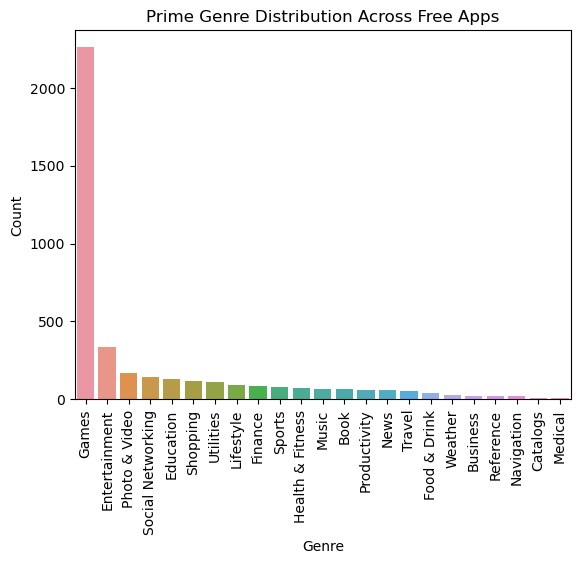

In [29]:
# Count the occurrences and sort them
genre_counts = df_fapps['prime_genre'].value_counts().reset_index()
genre_counts.columns = ['prime_genre', 'counts']

# Sort the DataFrame by the counts
genre_counts = genre_counts.sort_values('counts', ascending=False)

# Create the bar plot
sns.barplot(x='prime_genre', y='counts', data=genre_counts, order=genre_counts['prime_genre'])
plt.title('Prime Genre Distribution Across Free Apps')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Top 3 Free App Genres: 




(1) Games

(2) Entertainment

(3) Photo & Video

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


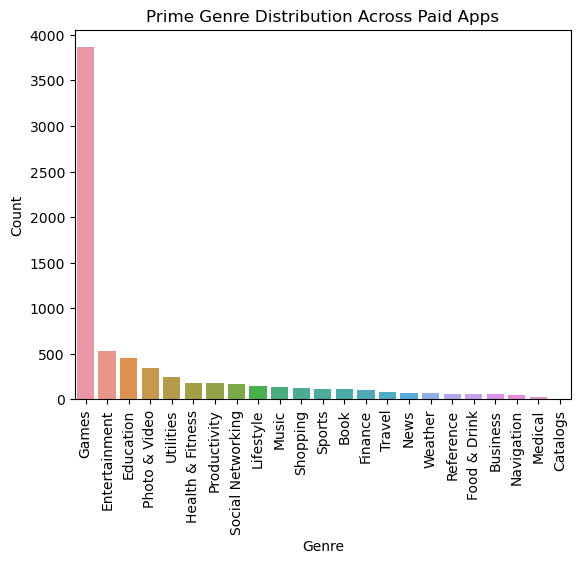

In [30]:
# Count the occurrences and sort them
genre_counts = df_apps['prime_genre'].value_counts().reset_index()
genre_counts.columns = ['prime_genre', 'counts']

# Sort the DataFrame by the counts
genre_counts = genre_counts.sort_values('counts', ascending=False)

# Create the bar plot
sns.barplot(x='prime_genre', y='counts', data=genre_counts, order=genre_counts['prime_genre'])
plt.title('Prime Genre Distribution Across Paid Apps')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Top 3 Paid App Genres: 




(1) Games

(2) Education

(3) Entertainment

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


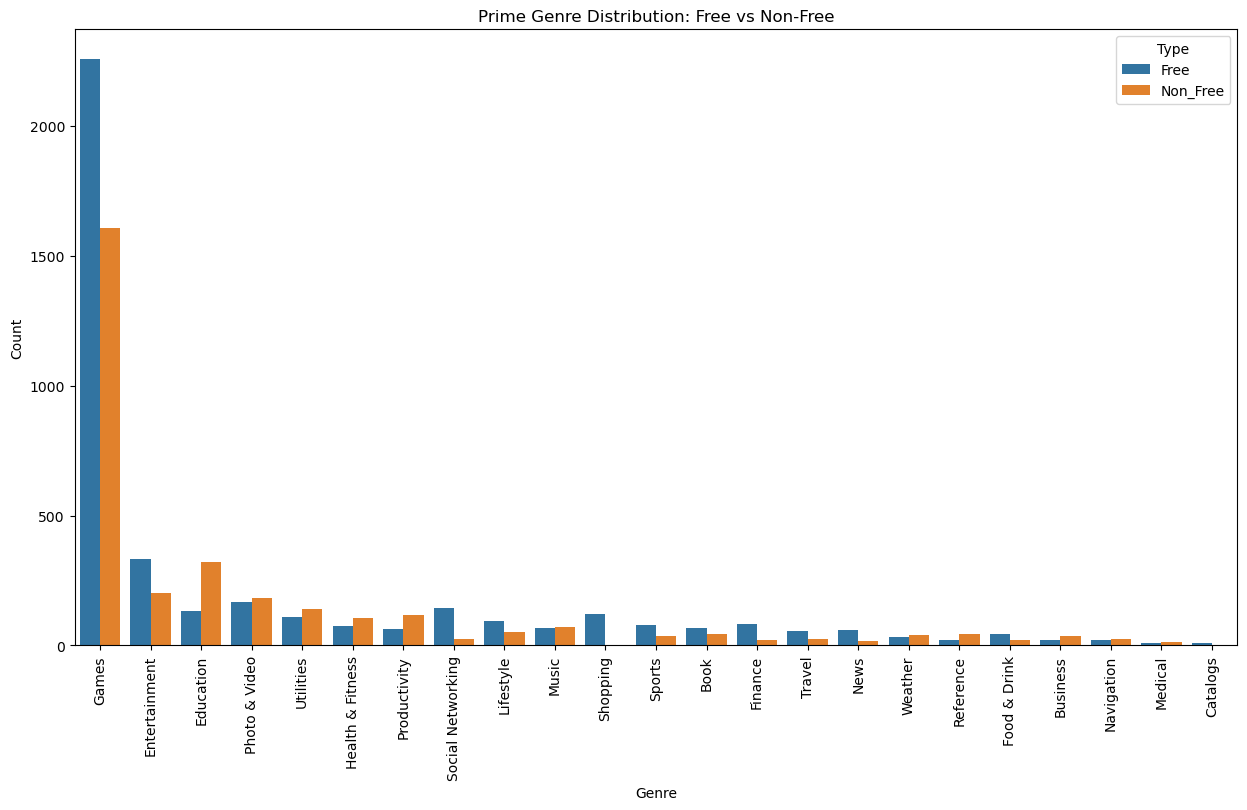

In [31]:
pm_count_free = df_fapps['prime_genre'].value_counts()
pm_count_non_free = df_nfapps['prime_genre'].value_counts()

combined_count = pd.DataFrame({'Free': pm_count_free, 'Non_Free': pm_count_non_free}).fillna(0)
combined_count['Total'] = combined_count['Free'] + combined_count['Non_Free']
combined_count = combined_count.sort_values(by='Total', ascending=False)

# Reset the index to get genre names as a column
combined_count.reset_index(inplace=True)
combined_count.rename(columns={'index': 'prime_genre'}, inplace=True)

# Melt the DataFrame from wide to long format
long_df = pd.melt(combined_count, id_vars=['prime_genre', 'Total'], value_vars=['Free', 'Non_Free'])

# Create the bar plot using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='prime_genre', y='value', hue='variable', data=long_df, order=combined_count['prime_genre'])

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Prime Genre Distribution: Free vs Non-Free')
plt.xticks(rotation=90)  # Rotate the x labels for better readability

plt.legend(title='Type')

plt.show()



### Takeaways on Genres of Free vs. Non-Free Apps:

(1) Education apps are mostly non-free

(2) Social Networking apps are mostly free

(3) Shopping apps are overwhelmingly free

## 2.2 User Ratings: Price and Genre 

/var/folders/43/7hj88rfd69j8z50s5502hv4r0000gn/T/ipykernel_4629/2042135238.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_genre=df_apps[['prime_genre','user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False).reset_index()
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ado

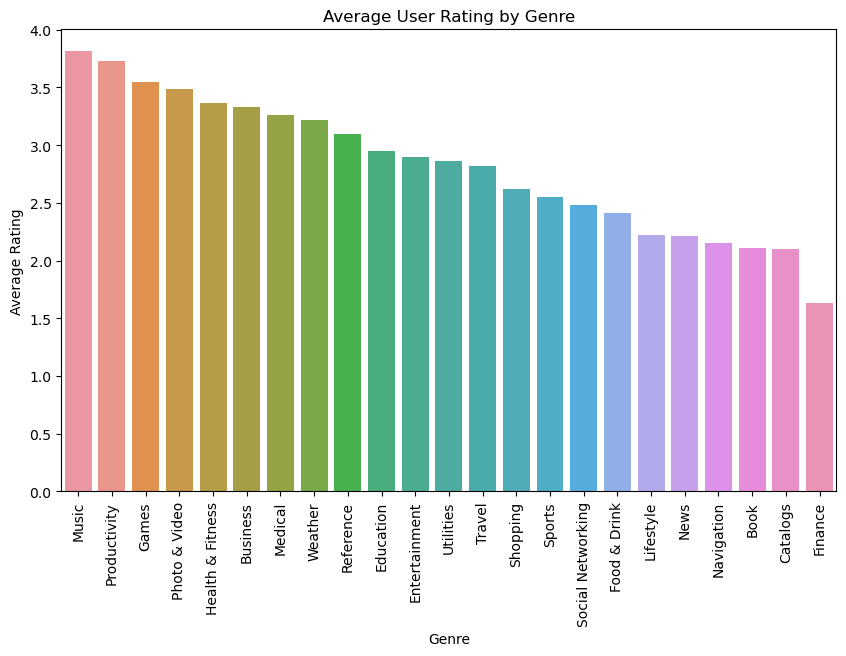

In [32]:
rating_genre=df_apps[['prime_genre','user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='prime_genre', y='user_rating', data=rating_genre, order=rating_genre['prime_genre'])
plt.title('Average User Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

### Top 3 Genres by Rating 

(1) Productivity

(2) Music

(3) Photo & Video

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


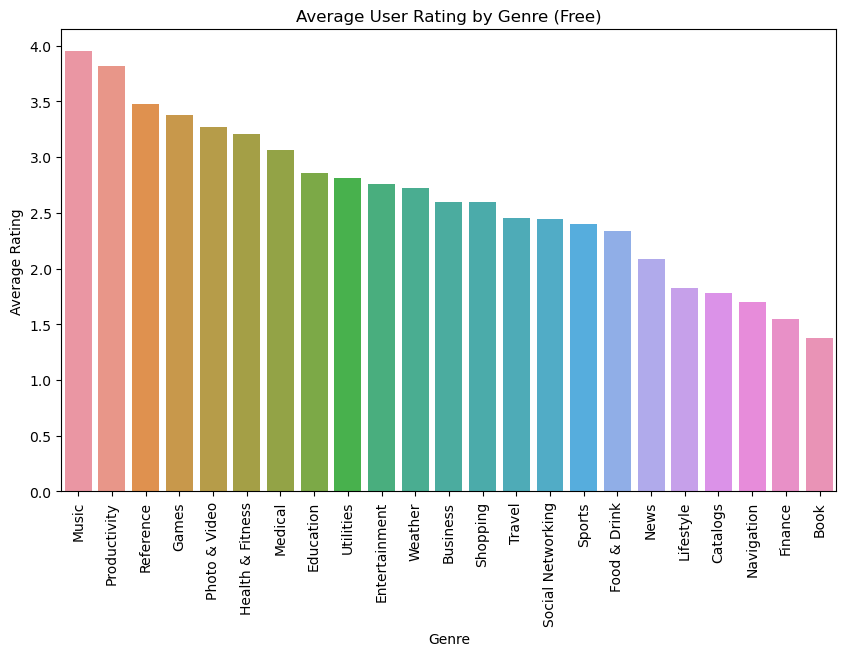

In [33]:
rating_genre=df_fapps[['prime_genre','user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='prime_genre', y='user_rating', data=rating_genre, order=rating_genre['prime_genre'])
plt.title('Average User Rating by Genre (Free)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

### Top 3 Genres by Rating (Free Apps)

(1) Productivity

(2) Music

(3) Photos & Video

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


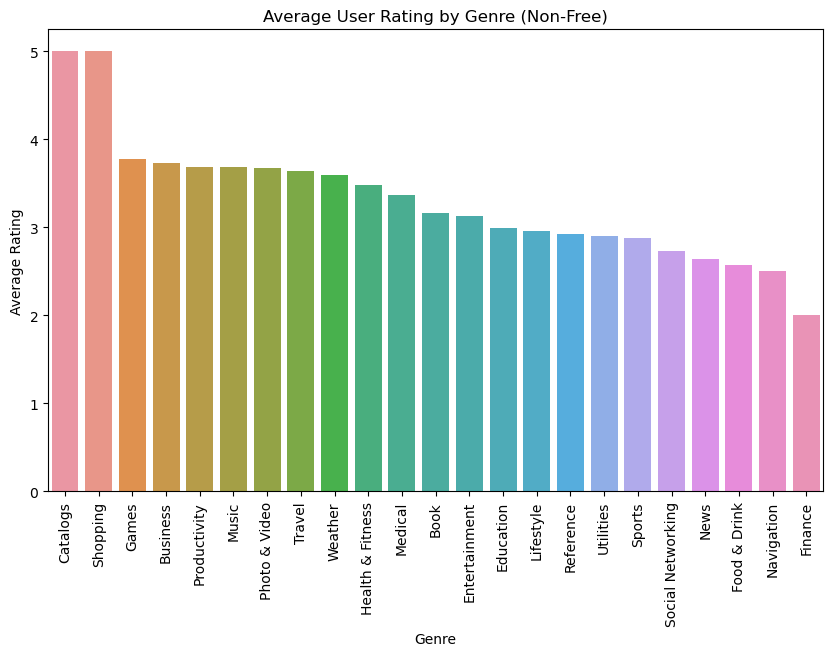

In [34]:
rating_genre=df_nfapps[['prime_genre','user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='prime_genre', y='user_rating', data=rating_genre, order=rating_genre['prime_genre'])
plt.title('Average User Rating by Genre (Non-Free)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

### Top 3 Genres by Rating (Non-Free Apps)

(1) Catalogs

(2) Shopping

(3) Productivity

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


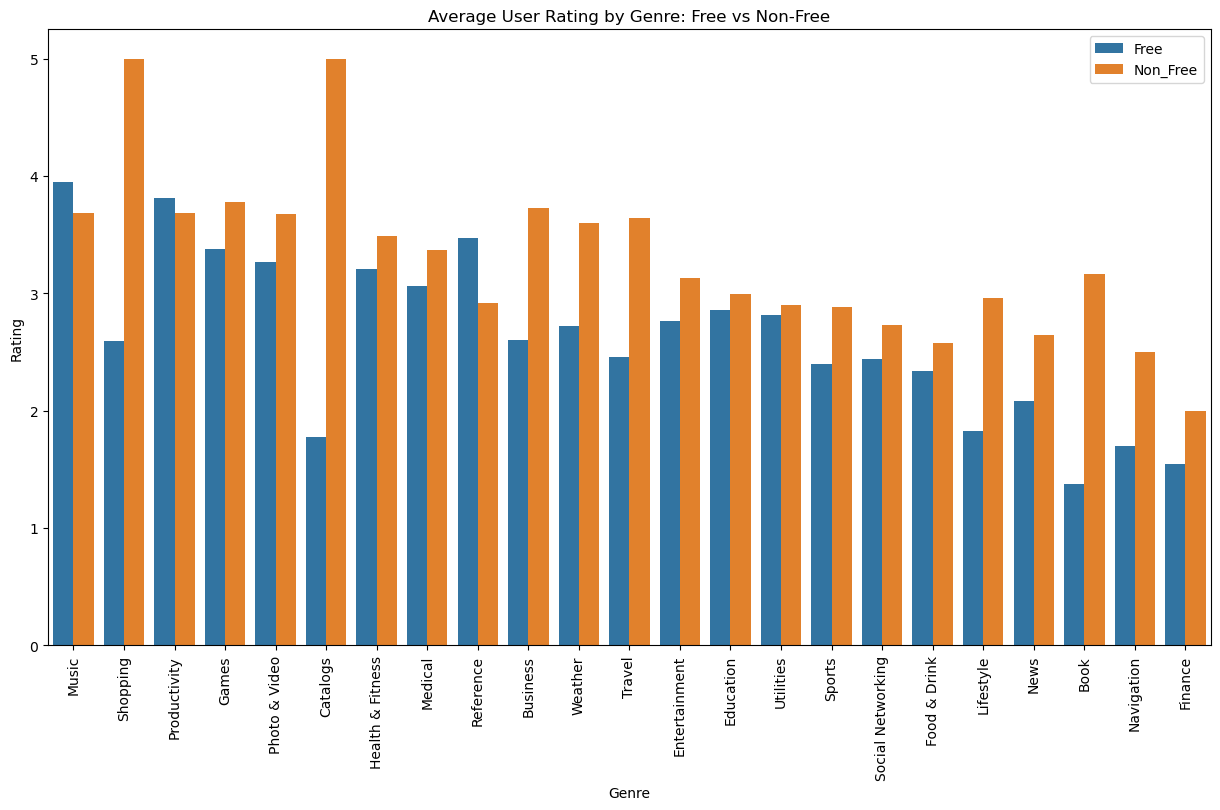

In [35]:
rating_genre_nonfree=df_nfapps[['prime_genre','user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)
rating_genre_free=df_fapps[['prime_genre','user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)

combined_rating = pd.DataFrame({'Free': rating_genre_free, 'Non_Free': rating_genre_nonfree}).fillna(0)
combined_rating['Total'] = combined_rating['Free'] + combined_rating['Non_Free']
combined_rating = combined_rating.sort_values(by='Total', ascending=False)

combined_rating.reset_index(inplace=True)
long_df = pd.melt(combined_rating, id_vars=['prime_genre', 'Total'], value_vars=['Free', 'Non_Free'])

plt.figure(figsize=(15, 8))
sns.barplot(x='prime_genre', y='value', hue='variable', data=long_df, order=combined_rating['prime_genre'])


plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Average User Rating by Genre: Free vs Non-Free')
plt.xticks(rotation=90)
plt.legend()

plt.show()

### Takeaways on Genres Ratings of Free vs. Non-Free Apps:

(1) Non-free Catalog Apps have drastically higher average ratings than free ones 

(2) Non-free Book Apps have drastically higher average ratings than free ones 

(3) Non-free Navigation and Finance Apps have significantly higher average ratings than free ones 

(4) In generally, within the same genre, non-free apps have higher average ratings 

## 2.3 App Size: Price and Genre

/var/folders/43/7hj88rfd69j8z50s5502hv4r0000gn/T/ipykernel_4629/2712864506.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_genre=df_apps[['prime_genre','size_bytes_mb']].groupby('prime_genre').mean()['size_bytes_mb'].sort_values(ascending=False).reset_index()
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to a

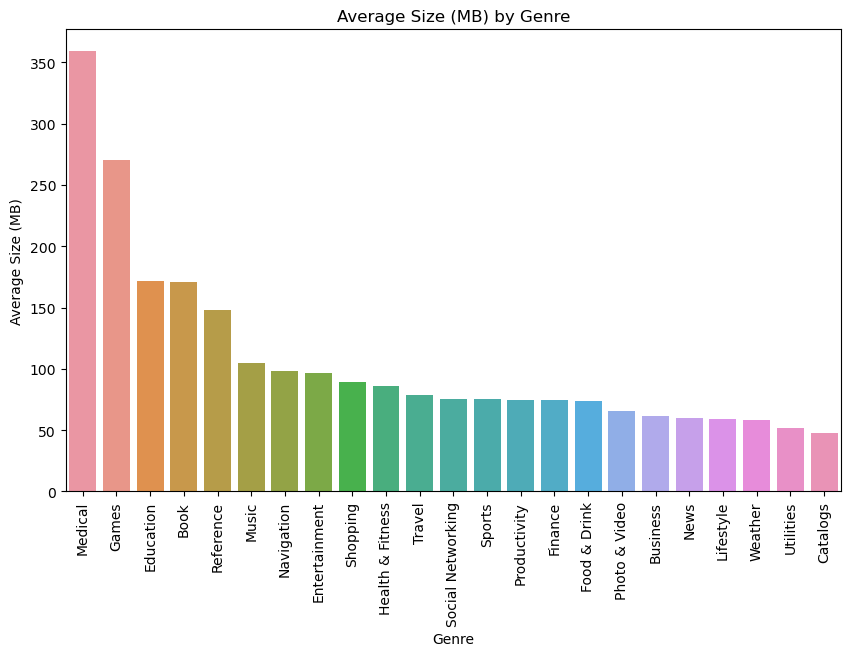

In [36]:
size_genre=df_apps[['prime_genre','size_bytes_mb']].groupby('prime_genre').mean()['size_bytes_mb'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='prime_genre', y='size_bytes_mb', data=size_genre, order=size_genre['prime_genre'])
plt.title('Average Size (MB) by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Size (MB)')
plt.xticks(rotation=90)
plt.show()

### Top 3 Genres by Size

(1) Medical

(2) Games

(3) Education 

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


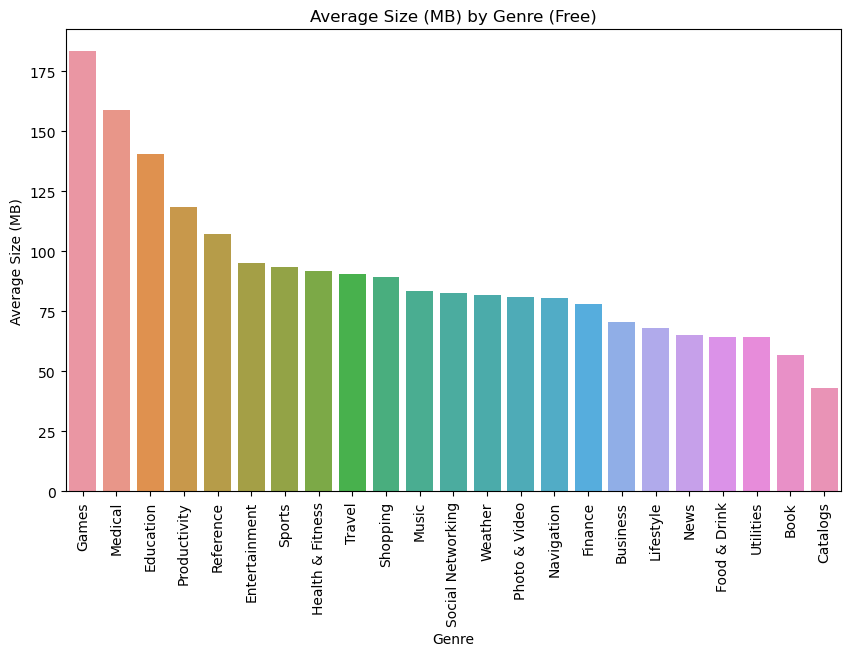

In [37]:
size_genre=df_fapps[['prime_genre','size_bytes_mb']].groupby('prime_genre').mean()['size_bytes_mb'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='prime_genre', y='size_bytes_mb', data=size_genre, order=size_genre['prime_genre'])
plt.title('Average Size (MB) by Genre (Free)')
plt.xlabel('Genre')
plt.ylabel('Average Size (MB)')
plt.xticks(rotation=90)
plt.show()

### Top 3 Genres by Size ( Free Apps)

(1) Games 

(2) Medical 

(3) Education

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


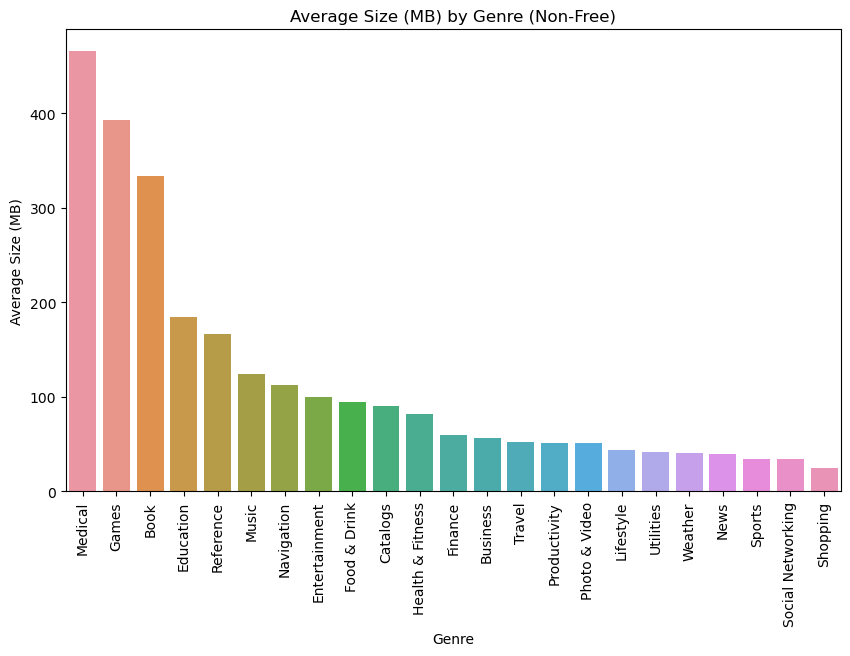

In [38]:
size_genre=df_nfapps[['prime_genre','size_bytes_mb']].groupby('prime_genre').mean()['size_bytes_mb'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='prime_genre', y='size_bytes_mb', data=size_genre, order=size_genre['prime_genre'])
plt.title('Average Size (MB) by Genre (Non-Free)')
plt.xlabel('Genre')
plt.ylabel('Average Size (MB)')
plt.xticks(rotation=90)
plt.show()

### Top 3 Genres by Size (Non-Free Apps)

(1) Medical 

(2) Games 

(3) Book 

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


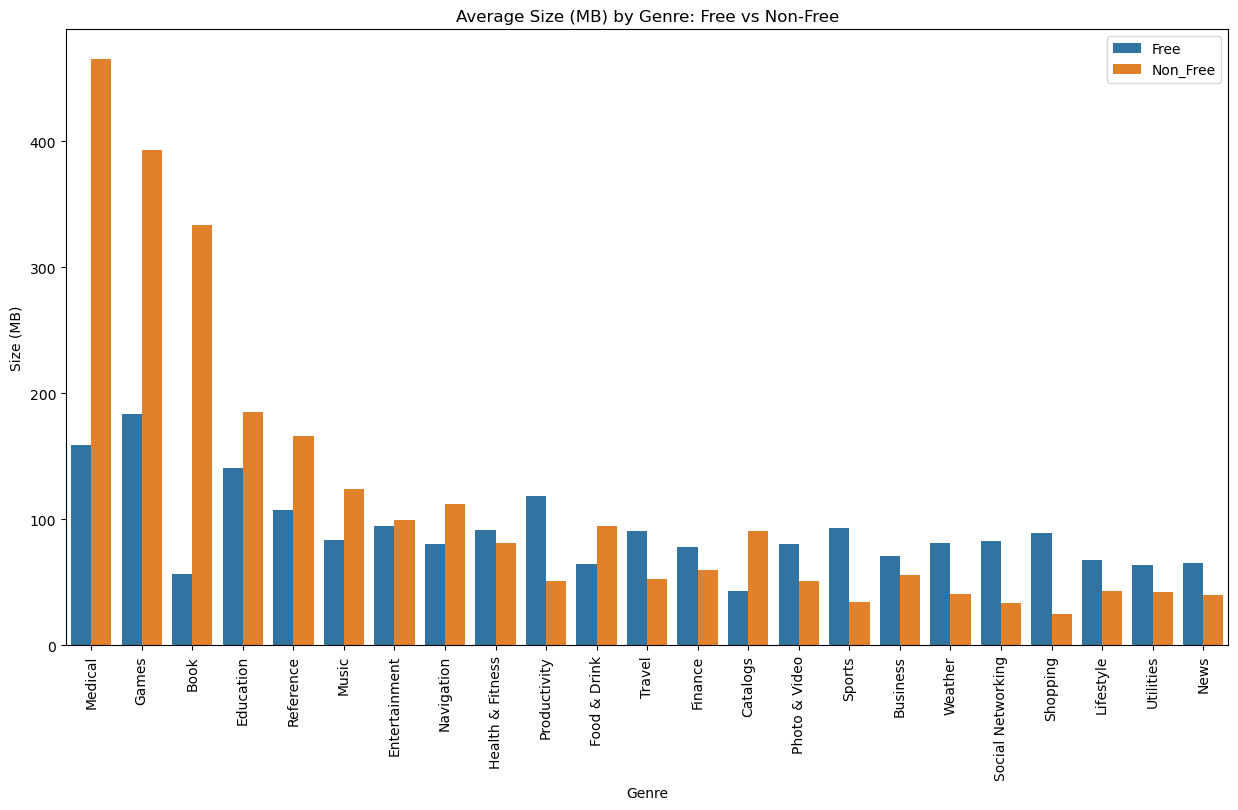

In [39]:
size_genre_nonfree=df_nfapps[['prime_genre','size_bytes_mb']].groupby('prime_genre').mean()['size_bytes_mb'].sort_values(ascending=False)
size_genre_free=df_fapps[['prime_genre','size_bytes_mb']].groupby('prime_genre').mean()['size_bytes_mb'].sort_values(ascending=False)

combined_size_genre = pd.DataFrame({'Free': size_genre_free, 'Non_Free': size_genre_nonfree}).fillna(0)
combined_size_genre['Total'] = combined_size_genre['Free'] + combined_size_genre['Non_Free']
combined_size_genre = combined_size_genre.sort_values(by='Total', ascending=False)


combined_size_genre.reset_index(inplace=True)
long_df = pd.melt(combined_size_genre, id_vars=['prime_genre', 'Total'], value_vars=['Free', 'Non_Free'])

plt.figure(figsize=(15, 8))
sns.barplot(x='prime_genre', y='value', hue='variable', data=long_df, order=combined_size_genre['prime_genre'])

plt.xlabel('Genre')
plt.ylabel('Size (MB)')
plt.title('Average Size (MB) by Genre: Free vs Non-Free')
plt.xticks(rotation=90)
plt.legend()

plt.show()

### Takeaways on Genres Ratings of Free vs. Non-Free Apps:

(1) Medical, Games, and Book apps have dramatically larger size when they are non-free

(2) In generally, medical, games, education, book, reference, catalog and music apps have larget size when non-free

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


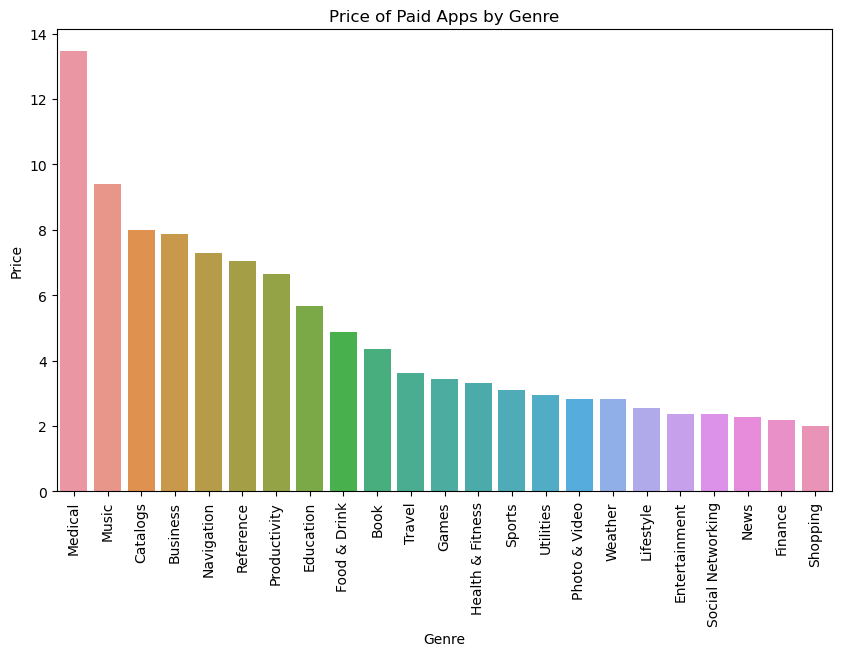

In [40]:
price_genre=df_nfapps[['prime_genre','price']].groupby('prime_genre').mean()['price'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='prime_genre', y='price', data=price_genre, order=price_genre['prime_genre'])
plt.title('Price of Paid Apps by Genre')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

### Top 3 Genres by Price 

(1) Medical

(2) Music

(3) Catalogs

## 2.4 Correlaton Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

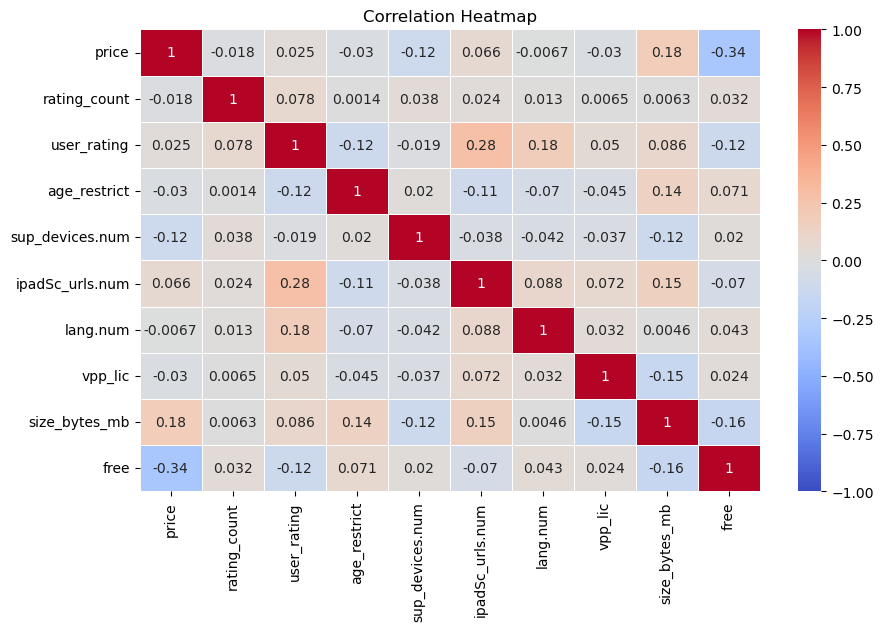

In [41]:
df_temp=df_apps.drop(['id','track_name','app_desc','prime_genre'],axis=1)
df_temp
corr_matrix=df_temp.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,linewidth=0.5)
plt.title('Correlation Heatmap')

### Positive Correlations (>0.1):
- Price & Size
- number of screenshots shown for display & Rating
- number of supported languages & Rating
- Age restriction & Size
- Size & # of screenshots shown for display


### Negative Correlation (<-0.1):
- Age restriction & Rating
- Price & number of supported devices
- Age restriction & number of screenshots shown for display
- Size & number of supported Devices
- Vpp Device Based Licensing Enabled & Size
- Free & Rating
- Free & # of screenshots shown for display
- Free & Size

## 2.5 EDA Conclusions

1. General Mobile Application Market Trends:
- Diversity in Entertainment Apps: A significant proportion of both paid and free apps in the market falls under games and entertainment. This prevalence doesn't necessarily equate to the highest market share but indicates a wide variety in this category. The reasons could be multifaceted: users have diverse tastes and are constantly seeking new content in gaming and entertainment, or perhaps these types of apps have lower technical and developmental barriers compared to other categories.
- Pricing Strategies in Social and Shopping Apps: Social networking and shopping apps predominantly adopt a free pricing model. This could be attributed to their nature as platforms that generate revenue through avenues other than direct sales, such as product purchases on shopping apps or advertising on social networks. On the contrary, education apps tend to be paid, likely due to the value of the educational content they provide.

2. Relationships Between App Features and Ratings 
- Quality Variation in Free Apps: Across various genres, free apps (or the combination of free and paid apps) don't consistently reach an average rating of 4 or above. This observation suggests a higher variation in the quality of free apps.
- High Ratings in Paid Catalog and Shopping Apps: Paid catalog and shopping apps tend to have average ratings close to 5. This trend might indicate that users are more inclined to pay for apps that they perceive to have high quality or essential features.
- Content Volume and App Size: Paid apps in medical, games, books, and education categories are generally larger in size compared to their free counterparts, implying a greater volume of content. Additionally, paid apps in these genres usually have slightly to moderately higher ratings than free versions, indicating a perceived increase in value. Medical apps, in particular, have the highest average price, reflecting the specialized nature and potentially the quality of their content. 

# 3. Natural Language Processing (NLP)

## 3.1 Common Description Words

In [42]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from wordcloud import WordCloud

In [43]:
tokenizer_punc = RegexpTokenizer("[\w']+")
stop_words = set(stopwords.words("english"))

# Remove all digits from the description column. 
df_apps['tokens'] = df_apps['app_desc'].apply(lambda x: re.sub(r'\d+','',x.lower()))

# Remove punctuation
df_apps['tokens'] = df_apps['tokens'].apply(lambda x:tokenizer_punc.tokenize(x))

# Remove stopwords.
df_apps['tokens'] = df_apps['tokens'].apply(lambda x:[word for word in x if word not in stop_words])

df_apps.head()

id                                         track_name  price  \
0  281656475                                    PAC-MAN Premium   3.99   
1  281796108                          Evernote - stay organized   0.00   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   0.00   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   0.00   
4  282935706                                              Bible   0.00   

   rating_count  user_rating age_restrict   prime_genre  sup_devices.num  \
0            26          4.5            4         Games               38   
1            26          3.5            4  Productivity               37   
2          2822          4.5            4       Weather               37   
3           649          4.5           12      Shopping               37   
4          5320          5.0            4     Reference               37   

   ipadSc_urls.num  lang.num  vpp_lic  size_bytes_mb free  \
0                5        10        1      96.119141    0   
1                5        23        1     151.232422    1   
2                5         3        1      95.867188    1   
3                5         9        1     122.558594    1   
4                5        45        1      88.476562    1   

                                            app_desc  \
0  SAVE 20%, now only $3.99 for a limited time!\n...   
1  Let Evernote change the way you organize your ...   
2  Download the most popular free weather app pow...   
3  The eBay app is the best way to find anything ...   
4  On more than 250 million devices around the wo...   

                                              tokens  
0  [save, limited, time, one, popular, video, gam...  
1  [let, evernote, change, way, organize, persona...  
2  [download, popular, free, weather, app, powere...  
3  [ebay, app, best, way, find, anything, need, d...  
4  [million, devices, around, world, people, read...

In [44]:
desc=df_apps['tokens'].tolist()

# Construct a list of all appearing tokens 

desc_words=[]

for tokens in desc:
    for token in tokens:
        desc_words.append(token)
        
desc_freq=Counter(desc_words)

# compute the top 50 frequent occuring tokens 

desc_freq_50=dict(desc_freq.most_common(50))

desc_labels,desc_values = zip(*desc_freq_50.items())

# Plot bar chart 

desc_freq_50=pd.DataFrame({'word':desc_labels,'freq':desc_values})

plt.figure(figsize=(10,6))

fig = px.bar(desc_freq_50, x="word", y="freq", title="Top 50 Most Common App Description Words")

fig.show()

<Figure size 1000x600 with 0 Axes>

### Common and meaningful description words across all apps:

- game
- new
- play
- use
- features
- time
- free
- world
- iphone
- facebook
- fun
- ipad
- friends
- support
- privacy
- help
- find
- touch
- twitter
- create 
- experience
- real
- share
- easy
- different
- unique

In [45]:
# updating the list of stop words to include the common but meaningless words we found in the previous graph

additional_stop_words = {'com', 'app','http','www'}
stop_words.update(additional_stop_words)

df_apps['tokens'] = df_apps['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [46]:
# Compute the top 50 most common high rating apps description words 

df_high_ratings=df_apps[df_apps['user_rating']>=4.5]

desc=df_high_ratings['tokens'].tolist()

desc_words=[]

for tokens in desc:
    for token in tokens:
        desc_words.append(token)
        
desc_freq=Counter(desc_words)

desc_freq_50=dict(desc_freq.most_common(50))

desc_labels,desc_values = zip(*desc_freq_50.items())

desc_freq_50=pd.DataFrame({'word':desc_labels,'freq':desc_values})


plt.figure(figsize=(10,6))

fig= px.bar(desc_freq_50, x="word", y="freq", title="Top 50 Most Common High Rating App Description Words ")

fig.show()

<Figure size 1000x600 with 0 Axes>

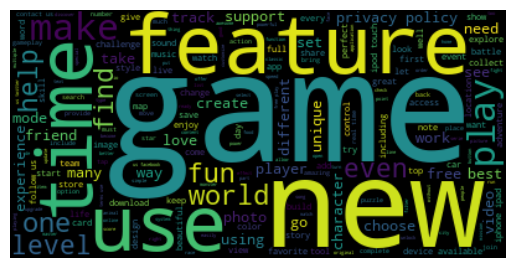

In [47]:
# Visualize the common words using word clouds 

flat_list = [word for sublist in df_apps['tokens'] for word in sublist]
single_string_desc = ' '.join(flat_list)

wordcloud = WordCloud().generate(single_string_desc)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3.2 Co-Occurance Analysis of High-Rating App Description words 

In [48]:
# Compute a list of word pairs for the 50 most common description words 

high_words=list(desc_labels)
word_pairs = [(high_words[i], high_words[j]) for i in range(len(high_words)) for j in range(i+1, len(high_words))]

In [49]:
co_occurrence_probabilities = Counter() 

# Compute the probabilities of word pairs appearing in the same app description
for word1, word2 in word_pairs:
    count = 0
    for tokens in desc:
        if word1 in tokens and word2 in tokens: 
            count += 1
    co_occurrence_probabilities[(word1, word2)] = count / len(desc)

co_occurrence_probabilities.most_common(50)

[(('game', 'play'), 0.3591038182391922),
 (('game', 'new'), 0.3218680971915431),
 (('game', 'features'), 0.31397917324076996),
 (('new', 'features'), 0.3057746923319659),
 (('new', 'play'), 0.2840012622278321),
 (('play', 'features'), 0.2732723256547807),
 (('time', 'features'), 0.25370779425686335),
 (('use', 'features'), 0.25244556642473964),
 (('new', 'use'), 0.24266330072578102),
 (('new', 'time'), 0.2414010728936573),
 (('new', 'free'), 0.2414010728936573),
 (('game', 'world'), 0.2363521615651625),
 (('game', 'games'), 0.23603660460713158),
 (('features', 'like'), 0.23540549069106972),
 (('features', 'free'), 0.23382770590091512),
 (('game', 'free'), 0.2287787945724203),
 (('game', 'time'), 0.22783212369832756),
 (('facebook', 'twitter'), 0.225938781950142),
 (('new', 'like'), 0.22372988324392554),
 (('new', 'get'), 0.22246765541180183),
 (('play', 'free'), 0.21962764278952351),
 (('features', 'get'), 0.21962764278952351),
 (('new', 'us'), 0.2117387188387504),
 (('us', 'facebook')

## 3.3 NLP Analysis Conslusion

1. Semantic Patterns for High Rating Apps:

- Common Themes: The frequent occurrence of words like "game," "play," "time," "world," and "fun" suggests that high-rating apps are often associated with entertainment, engagement, and user immersion.
- Functionality and Usability: Words like "features," "use," "easy," "support," and "help" indicate that high-rating apps are often perceived as feature-rich, user-friendly, and supportive, which are qualities that users may find valuable.
- Social Connectivity: The presence of words such as "friends," "social," "share," "connect," and "Facebook" reflects a trend of high-rating apps facilitating social interaction or being associated with well-known social platforms.
- Device Integration: The mention of specific devices and platforms like "iPhone," "iPad," "touch," "Apple," and "mobile" implies that high-rating apps are optimized or marketed with particular hardware or ecosystems in mind, enhancing their appeal to users of those devices.

2. Co-Occurance Implications:
- Engagement and Novelty: The high co-occurrence of words like "game" with "new" and "play" suggests that users of high-rating apps value engaging content and novelty. This might imply that frequent updates or new features contribute positively to user satisfaction.
- Feature-Rich Applications: The association of "features" with words like "new," "free," and "use" indicates that high-rating apps are often perceived as feature-rich and user-centric. The prominence of "free" also suggests that offering free features or content could be a strong selling point.


# 4. Dimensionality Reduction 

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
df_apps.head()

id                                         track_name  price  \
0  281656475                                    PAC-MAN Premium   3.99   
1  281796108                          Evernote - stay organized   0.00   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   0.00   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   0.00   
4  282935706                                              Bible   0.00   

   rating_count  user_rating age_restrict   prime_genre  sup_devices.num  \
0            26          4.5            4         Games               38   
1            26          3.5            4  Productivity               37   
2          2822          4.5            4       Weather               37   
3           649          4.5           12      Shopping               37   
4          5320          5.0            4     Reference               37   

   ipadSc_urls.num  lang.num  vpp_lic  size_bytes_mb free  \
0                5        10        1      96.119141    0   
1                5        23        1     151.232422    1   
2                5         3        1      95.867188    1   
3                5         9        1     122.558594    1   
4                5        45        1      88.476562    1   

                                            app_desc  \
0  SAVE 20%, now only $3.99 for a limited time!\n...   
1  Let Evernote change the way you organize your ...   
2  Download the most popular free weather app pow...   
3  The eBay app is the best way to find anything ...   
4  On more than 250 million devices around the wo...   

                                              tokens  
0  [save, limited, time, one, popular, video, gam...  
1  [let, evernote, change, way, organize, persona...  
2  [download, popular, free, weather, powered, la...  
3  [ebay, best, way, find, anything, need, dresse...  
4  [million, devices, around, world, people, read...

In [52]:
# We will flag high ratings (user rating > 4)

df_apps['high_rating'] = df_apps['user_rating'].apply(lambda x: 1 if x > 4 else 0)
df_apps

id                                         track_name  price  \
0      281656475                                    PAC-MAN Premium   3.99   
1      281796108                          Evernote - stay organized   0.00   
2      281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   0.00   
3      282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   0.00   
4      282935706                                              Bible   0.00   
...          ...                                                ...    ...   
7192  1187617475                                              Kubik   0.00   
7193  1187682390                                  VR Roller-Coaster   0.00   
7194  1187779532              Bret Michaels Emojis + Lyric Keyboard   1.99   
7195  1187838770          VR Roller Coaster World - Virtual Reality   0.00   
7196  1188375727                       Escape the Sweet Shop Series   0.00   

      rating_count  user_rating age_restrict   prime_genre  sup_devices.num  \
0               26          4.5            4         Games               38   
1               26          3.5            4  Productivity               37   
2             2822          4.5            4       Weather               37   
3              649          4.5           12      Shopping               37   
4             5320          5.0            4     Reference               37   
...            ...          ...          ...           ...              ...   
7192            75          4.5            4         Games               38   
7193            30          4.5            4         Games               38   
7194             0          0.0            9     Utilities               37   
7195            32          4.5           12         Games               38   
7196             3          5.0            4         Games               40   

      ipadSc_urls.num  lang.num  vpp_lic  size_bytes_mb free  \
0                   5        10        1      96.119141    0   
1                   5        23        1     151.232422    1   
2                   5         3        1      95.867188    1   
3                   5         9        1     122.558594    1   
4                   5        45        1      88.476562    1   
...               ...       ...      ...            ...  ...   
7192                5         1        1     120.777344    1   
7193                0         1        1     115.166016    1   
7194                1         1        1     106.165039    0   
7195                0         2        1      92.731445    1   
7196                0         2        1      86.687500    1   

                                               app_desc  \
0     SAVE 20%, now only $3.99 for a limited time!\n...   
1     Let Evernote change the way you organize your ...   
2     Download the most popular free weather app pow...   
3     The eBay app is the best way to find anything ...   
4     On more than 250 million devices around the wo...   
...                                                 ...   
7192  Place the falling blocks correctly in order to...   
7193  A thrilling virtual reality roller coaster exp...   
7194  Rock star Bret Michaels, winner of Celebrity A...   
7195  VR Roller Coaster World is an app for Google C...   
7196  5 previous escape games plus 1 new game in one...   

                                                 tokens  high_rating  
0     [save, limited, time, one, popular, video, gam...            1  
1     [let, evernote, change, way, organize, persona...            0  
2     [download, popular, free, weather, powered, la...            1  
3     [ebay, best, way, find, anything, need, dresse...            1  
4     [million, devices, around, world, people, read...            1  
...                                                 ...          ...  
7192  [place, falling, blocks, correctly, order, cle...            1  
7193  [thrilling, virtual, reality, roller, coaster,...            1  
7194  [rock

# 4.1 Feature Engineering

In [53]:
cont_features=df_apps[['price','rating_count','sup_devices.num','ipadSc_urls.num','vpp_lic','size_bytes_mb']]
dummy_features=df_apps[['age_restrict','prime_genre']]

### One-Hot Encoding
To ensure that machine learning algorithms interpret categories accurately, we employ one-hot encoding, where each unique category of a categorical variable is transformed into a binary column.

In [54]:
pd.get_dummies(dummy_features,dtype=int).head()

age_restrict_12  age_restrict_17  age_restrict_4  age_restrict_9  \
0                0                0               1               0   
1                0                0               1               0   
2                0                0               1               0   
3                1                0               0               0   
4                0                0               1               0   

   prime_genre_Book  prime_genre_Business  prime_genre_Catalogs  \
0                 0                     0                     0   
1                 0                     0                     0   
2                 0                     0                     0   
3                 0                     0                     0   
4                 0                     0                     0   

   prime_genre_Education  prime_genre_Entertainment  prime_genre_Finance  ...  \
0                      0                          0                    0  ...   
1                      0                          0                    0  ...   
2                      0                          0                    0  ...   
3                      0                          0                    0  ...   
4                      0                          0                    0  ...   

   prime_genre_News  prime_genre_Photo & Video  prime_genre_Productivity  \
0                 0                          0                         0   
1                 0                          0                         1   
2                 0                          0                         0   
3                 0                          0                         0   
4                 0                          0                         0   

   prime_genre_Reference  prime_genre_Shopping  prime_genre_Social Networking  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      0                     0                              0   
3                      0                     1                              0   
4                      1                     0                              0   

   prime_genre_Sports  prime_genre_Travel  prime_genre_Utilities  \
0                   0                   0                      0   
1                   0                   0                      0   
2                   0                   0                      0   
3                   0                   0                      0   
4                   0                   0                      0   

   prime_genre_Weather  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  

[5 rows x 27 columns]

In [55]:
X_encoded = pd.get_dummies(dummy_features,dtype=int)
X_encoded

age_restrict_12  age_restrict_17  age_restrict_4  age_restrict_9  \
0                   0                0               1               0   
1                   0                0               1               0   
2                   0                0               1               0   
3                   1                0               0               0   
4                   0                0               1               0   
...               ...              ...             ...             ...   
7192                0                0               1               0   
7193                0                0               1               0   
7194                0                0               0               1   
7195                1                0               0               0   
7196                0                0               1               0   

      prime_genre_Book  prime_genre_Business  prime_genre_Catalogs  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   
...                ...                   ...                   ...   
7192                 0                     0                     0   
7193                 0                     0                     0   
7194                 0                     0                     0   
7195                 0                     0                     0   
7196                 0                     0                     0   

      prime_genre_Education  prime_genre_Entertainment  prime_genre_Finance  \
0                         0                          0                    0   
1                         0                          0                    0   
2                         0                          0                    0   
3                         0                          0                    0   
4                         0                          0                    0   
...                     ...                        ...                  ...   
7192                      0                          0                    0   
7193                      0                          0                    0   
7194                      0                          0                    0   
7195                      0                          0                    0   
7196                      0                          0                    0   

      ...  prime_genre_News  prime_genre_Photo & Video  \
0     ...                 0                          0   
1     ...                 0                          0   
2     ...                 0                          0   
3     ...                 0                          0   
4     ...                 0                          0   
...   ...               ...                        ...   
7192  ...                 0                          0   
7193  ...                 0                          0   
7194  ...                 0                          0   
7195  ...                 0                          0   
7196  ...                 0                          0   

      prime_genre_Productivity  prime_genre_Reference  prime_genre_Shopping  \
0                            0                      0                     0   
1                            1                      0                     0   
2                            0                      0                     0   
3                            0                      0                     1   
4                            0                      1                     0   
...                        ...                    ...                   ...   
7192                         0                      0                     0  

### Standard Scaling 

For continuous features, we apply standard scaling to ensure all features are on similar scales. Each feature contributes equally to the model's decision process, leading to a fair and balanced model.

In [56]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(cont_features)

X_scaled= pd.DataFrame(X_scaled, columns=cont_features.columns, index=cont_features.index)

X_scaled

price  rating_count  sup_devices.num  ipadSc_urls.num   vpp_lic  \
0     0.388126     -0.110805         0.170753         0.651051  0.083642   
1    -0.295960     -0.110805        -0.096808         0.651051  0.083642   
2    -0.295960      0.602428        -0.096808         0.651051  0.083642   
3    -0.295960      0.048117        -0.096808         0.651051  0.083642   
4    -0.295960      1.239643        -0.096808         0.651051  0.083642   
...        ...           ...              ...              ...       ...   
7192 -0.295960     -0.098305         0.170753         0.651051  0.083642   
7193 -0.295960     -0.109784         0.170753        -1.866742  0.083642   
7194  0.045225     -0.117437        -0.096808        -1.363183  0.083642   
7195 -0.295960     -0.109274         0.170753        -1.866742  0.083642   
7196 -0.295960     -0.116672         0.705877        -1.866742  0.083642   

      size_bytes_mb  
0         -0.273806  
1         -0.112911  
2         -0.274542  
3         -0.196620  
4         -0.296117  
...             ...  
7192      -0.201820  
7193      -0.218202  
7194      -0.244479  
7195      -0.283696  
7196      -0.301340  

[7197 rows x 6 columns]

In [57]:
X = pd.concat([X_scaled, X_encoded], axis=1)
X

price  rating_count  sup_devices.num  ipadSc_urls.num   vpp_lic  \
0     0.388126     -0.110805         0.170753         0.651051  0.083642   
1    -0.295960     -0.110805        -0.096808         0.651051  0.083642   
2    -0.295960      0.602428        -0.096808         0.651051  0.083642   
3    -0.295960      0.048117        -0.096808         0.651051  0.083642   
4    -0.295960      1.239643        -0.096808         0.651051  0.083642   
...        ...           ...              ...              ...       ...   
7192 -0.295960     -0.098305         0.170753         0.651051  0.083642   
7193 -0.295960     -0.109784         0.170753        -1.866742  0.083642   
7194  0.045225     -0.117437        -0.096808        -1.363183  0.083642   
7195 -0.295960     -0.109274         0.170753        -1.866742  0.083642   
7196 -0.295960     -0.116672         0.705877        -1.866742  0.083642   

      size_bytes_mb  age_restrict_12  age_restrict_17  age_restrict_4  \
0         -0.273806                0                0               1   
1         -0.112911                0                0               1   
2         -0.274542                0                0               1   
3         -0.196620                1                0               0   
4         -0.296117                0                0               1   
...             ...              ...              ...             ...   
7192      -0.201820                0                0               1   
7193      -0.218202                0                0               1   
7194      -0.244479                0                0               0   
7195      -0.283696                1                0               0   
7196      -0.301340                0                0               1   

      age_restrict_9  ...  prime_genre_News  prime_genre_Photo & Video  \
0                  0  ...                 0                          0   
1                  0  ...                 0                          0   
2                  0  ...                 0                          0   
3                  0  ...                 0                          0   
4                  0  ...                 0                          0   
...              ...  ...               ...                        ...   
7192               0  ...                 0                          0   
7193               0  ...                 0                          0   
7194               1  ...                 0                          0   
7195               0  ...                 0                          0   
7196               0  ...                 0                          0   

      prime_genre_Productivity  prime_genre_Reference  prime_genre_Shopping  \
0                            0                      0                     0   
1                            1                      0                     0   
2                            0                      0                     0   
3                            0                      0                     1   
4                            0                      1                     0   
...                        ...                    ...                   ...   
7192                         0                      0                     0   
7193                         0                      0                     0   
7194                         0                      0                     0   
7195                         0                      0                     0   
7196                         0                      0                     0   

      prime_genre_Social Networking  prime_genre_Sports  prime_genre_Travel  \
0                                 0                   0                   0   
1                                 0                   0                   0   
2                                 0                   0                   0   
3                                 0                   0          

# 4.2 TSNE 

### Two-Dimensional Representation of Non-Text Features 

In [58]:
tsne = TSNE(n_components=2, init='pca', perplexity=40, learning_rate=550)

apps_tsne_2d=tsne.fit_transform(X)

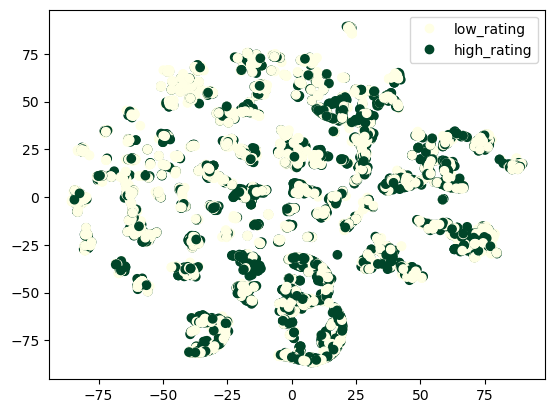

In [59]:
ratings = df_apps['high_rating']
plot=plt.scatter(apps_tsne_2d[:, 0], apps_tsne_2d[:, 1], c=ratings, cmap='YlGn')
labels= ['low_rating','high_rating']
plt.legend(handles=plot.legend_elements()[0], labels=labels)

### Two Dimensional Representation of App Descriptions

In [60]:
# Convert the list of tokens back into a string of words
df_apps['tokens_str'] = df_apps['tokens'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=300)  # You can adjust max_features as needed

# Fit and transform the 'tokens_str' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df_apps['tokens_str'])

# Initialize t-SNE with 2 components (2D)
tsne = TSNE(n_components=2, init='pca', perplexity=40, learning_rate=550)

# Apply t-SNE transformation
tsne_text = tsne.fit_transform(tfidf_matrix.toarray())  # Convert sparse matrix to dense

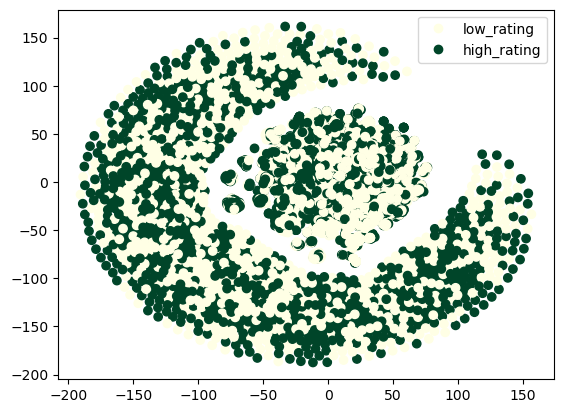

In [61]:
plot=plt.scatter(tsne_text[:, 0], tsne_text[:, 1], c=ratings, cmap='YlGn')
labels= ['low_rating','high_rating']
plt.legend(handles=plot.legend_elements()[0], labels=labels)

# 4.3 PCA 

### Two-Dimensional Representation of Non-Text Features 

In [62]:
pca = PCA(n_components=2)

apps_pca_2d = pca.fit_transform(X)

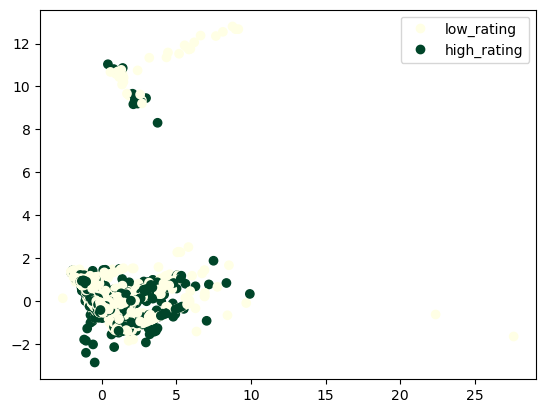

In [63]:
plot=plt.scatter(apps_pca_2d[:, 0], apps_pca_2d[:, 1], c=ratings, cmap='YlGn')
labels= ['low_rating','high_rating']
plt.legend(handles=plot.legend_elements()[0], labels=labels)

### Two Dimensional Representation of App Descriptions

In [64]:
# Initialize PCA with 2 components (2D)
pca = PCA(n_components=2)

# Apply t-SNE transformation
pca_text = pca.fit_transform(tfidf_matrix.toarray())  # Convert sparse matrix to dense

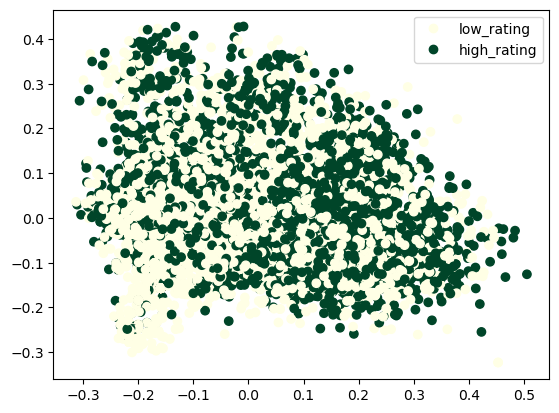

In [65]:
plot=plt.scatter(pca_text[:, 0], pca_text[:, 1], c=ratings, cmap='YlGn')
labels= ['low_rating','high_rating']
plt.legend(handles=plot.legend_elements()[0], labels=labels)

## 4.3 Dimensionality Reduction Conclusion

The application of PCA and t-SNE for dimensionality reduction on app features resulted in two-dimensional representations that did not demonstrate distinct clustering between apps with high and low ratings. This outcome indicates that such methods of dimensionality reduction may not be suitable for the classification challenges at hand.

Given the absence of well-defined groupings in the reduced feature space, the K-Nearest Neighbors (KNN) algorithm is likely unsuitable for our purposes. KNN's effectiveness depends on the premise that similar instances are proximate in the feature space, and without clear demarcation, the model's ability to accurately predict 'content rating' is compromised.

Furthermore, the lack of visible, distinct clusters or linear separations post-reduction suggests non-linear relationships between the features and the target variable. Consequently, models predicated on linearity, such as Logistic Regression—which assumes a linear relationship between the log-odds of the dependent variable and the independent variables—might not yield optimal results.

These insights steer us toward exploring more complex, possibly non-linear models that can navigate the intricacies of our dataset. Models such as Decision Trees or Random Forest, which do not hinge on the assumption of linearity and can capture more nuanced patterns within the data, may provide more accurate predictions for app ratings.

# 5.  Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

## 5.1 Additional Feature Engineering

In [67]:
# Inspect the engineered dataset 

X

price  rating_count  sup_devices.num  ipadSc_urls.num   vpp_lic  \
0     0.388126     -0.110805         0.170753         0.651051  0.083642   
1    -0.295960     -0.110805        -0.096808         0.651051  0.083642   
2    -0.295960      0.602428        -0.096808         0.651051  0.083642   
3    -0.295960      0.048117        -0.096808         0.651051  0.083642   
4    -0.295960      1.239643        -0.096808         0.651051  0.083642   
...        ...           ...              ...              ...       ...   
7192 -0.295960     -0.098305         0.170753         0.651051  0.083642   
7193 -0.295960     -0.109784         0.170753        -1.866742  0.083642   
7194  0.045225     -0.117437        -0.096808        -1.363183  0.083642   
7195 -0.295960     -0.109274         0.170753        -1.866742  0.083642   
7196 -0.295960     -0.116672         0.705877        -1.866742  0.083642   

      size_bytes_mb  age_restrict_12  age_restrict_17  age_restrict_4  \
0         -0.273806                0                0               1   
1         -0.112911                0                0               1   
2         -0.274542                0                0               1   
3         -0.196620                1                0               0   
4         -0.296117                0                0               1   
...             ...              ...              ...             ...   
7192      -0.201820                0                0               1   
7193      -0.218202                0                0               1   
7194      -0.244479                0                0               0   
7195      -0.283696                1                0               0   
7196      -0.301340                0                0               1   

      age_restrict_9  ...  prime_genre_News  prime_genre_Photo & Video  \
0                  0  ...                 0                          0   
1                  0  ...                 0                          0   
2                  0  ...                 0                          0   
3                  0  ...                 0                          0   
4                  0  ...                 0                          0   
...              ...  ...               ...                        ...   
7192               0  ...                 0                          0   
7193               0  ...                 0                          0   
7194               1  ...                 0                          0   
7195               0  ...                 0                          0   
7196               0  ...                 0                          0   

      prime_genre_Productivity  prime_genre_Reference  prime_genre_Shopping  \
0                            0                      0                     0   
1                            1                      0                     0   
2                            0                      0                     0   
3                            0                      0                     1   
4                            0                      1                     0   
...                        ...                    ...                   ...   
7192                         0                      0                     0   
7193                         0                      0                     0   
7194                         0                      0                     0   
7195                         0                      0                     0   
7196                         0                      0                     0   

      prime_genre_Social Networking  prime_genre_Sports  prime_genre_Travel  \
0                                 0                   0                   0   
1                                 0                   0                   0   
2                                 0                   0                   0   
3                                 0                   0          

In [68]:
# Inspect the distribution of high and low rating apps 

y = df_apps[['high_rating']]  

df_apps['high_rating'].value_counts()

high_rating
0    4028
1    3169
Name: count, dtype: int64

In [69]:
y = y.values.ravel()

# Train-Test Split: 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5.2 Preliminary Unrestricted Tree

In [70]:
# Fit a preliminary unrestricted decision tree model to the data

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
# Perform cross-validation
cv_scores = cross_val_score(dtree, X, y, cv=5, scoring='accuracy')

# Print the cross-validation accuracy for each fold
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())
print("")

# Use cross_val_predict to make predictions on the whole dataset
y_pred = cross_val_predict(dtree, X, y, cv=5)

# Print the classification report
print(classification_report(y, y_pred))

Cross-validation accuracy scores: [0.62986111 0.64375    0.6400278  0.64419736 0.64489229]
Mean cross-validation accuracy: 0.6405457107559263

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      4028
           1       0.59      0.59      0.59      3169

    accuracy                           0.64      7197
   macro avg       0.64      0.63      0.63      7197
weighted avg       0.64      0.64      0.64      7197



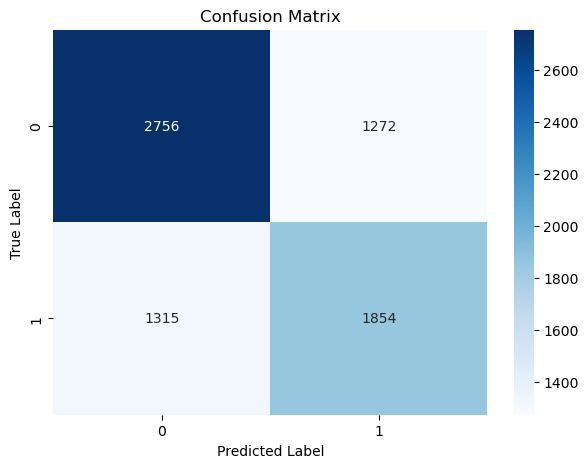

In [72]:
# Compute the confusion matrix 

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

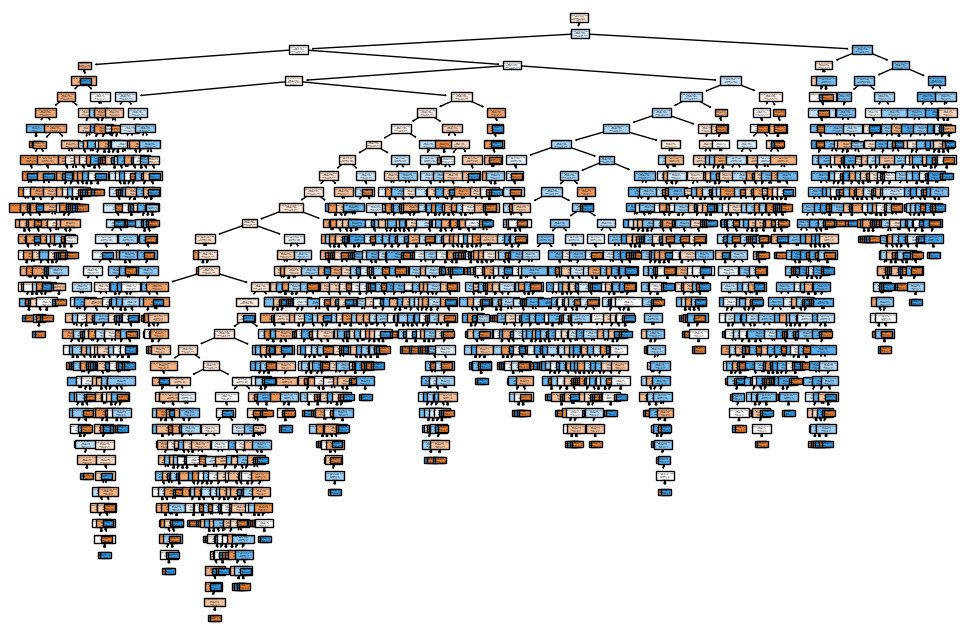

In [73]:
# Visualize the tree to inspect its size and complexity

plt.figure(figsize=(12,8))
class_names = [str(cls) for cls in dtree.classes_]
plot_tree(dtree, filled=True, feature_names=X.columns.tolist(), class_names=class_names)
plt.show()

## 5.3 Cost Complexity Pruning: Visualize Alpha

In [74]:
path = dtree.cost_complexity_pruning_path(X_train,y_train) # values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude the max alpha which excludes all leaves

dtrees=[] # create an array to store the trees


# create one tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    dtree.fit(X_train,y_train)
    dtrees.append(dtree)


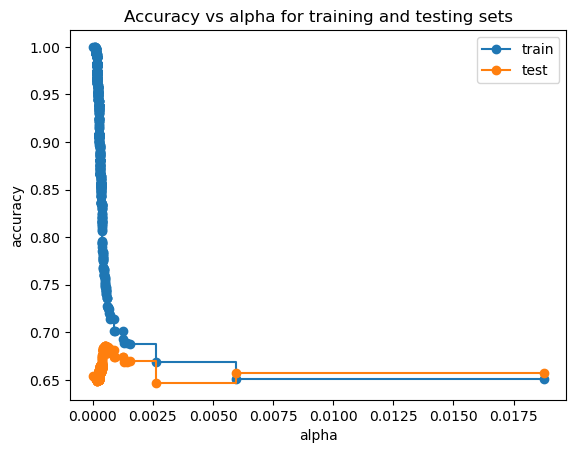

In [75]:
train_scores = [dtree.score(X_train,y_train) for dtree in dtrees]
test_scores = [dtree.score(X_test,y_test) for dtree in dtrees]

fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

In the graph above, we can see that the optimal alpha is approximately 0.0005. After this value, the accuracy of the training set drops off, suggesting potential overfitting. 

To determine the best training dataset for the trees, we use 10-fold cross-validation. 

<Axes: xlabel='tree'>

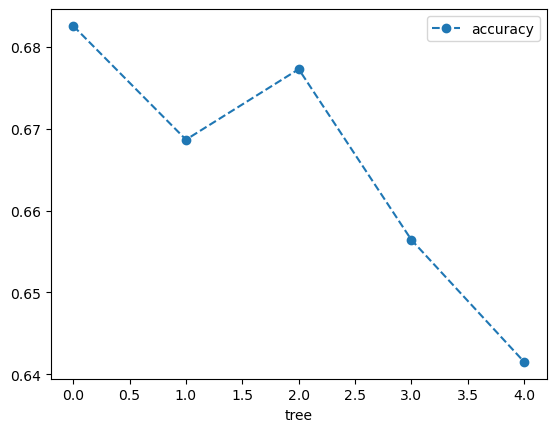

In [76]:
dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0005)

scores = cross_val_score(dtree, X_train, y_train, cv=5)

df = pd.DataFrame(data={'tree':range(5),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')


The graph above suggest that alpha is sensitive to datasets. We should use cross-validation to find the optimal alpha. 

<Axes: xlabel='alpha'>

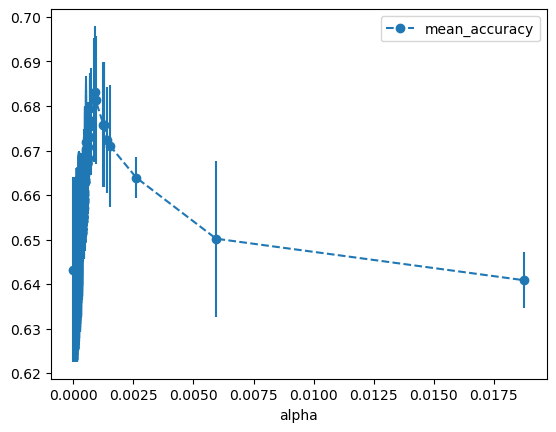

In [77]:
# Create an array to store the results of each fold during cross validation 
alpha_vals=[]

# For each candidate alpha, we run 5-fold cross validatin
# Then we store the meam and standard deviation of the accuracy scores foro each call

for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores=cross_val_score(dtree, X_train, y_train, cv=5)
    alpha_vals.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
# Graph the means and stds of the scores for each alpha candidate

alpha_results = pd.DataFrame(alpha_vals,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

With cross-validation, we can see that overall, the optimal alpha is closer to 0.001. 

In [78]:
alpha_results[(alpha_results['alpha']>0.0008)
               &
               (alpha_results['alpha']<0.0015)]

alpha  mean_accuracy       std
501  0.000863       0.681356  0.013830
502  0.000896       0.683144  0.014843
503  0.000926       0.681359  0.014438
504  0.001256       0.675801  0.013984
505  0.001276       0.675801  0.013984
506  0.001281       0.675801  0.013984
507  0.001412       0.672427  0.011928

alpha = 0.000896

## 5.4 Refined Decision Tree Model

In [79]:
ideal_ccp_alpha=0.000896

In [80]:
# Fit the pruned tree model to the dataset 

pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000896, random_state=42)

In [81]:
# Perform cross-validation
cv_scores = cross_val_score(pruned_tree, X, y, cv=5, scoring='accuracy')

# Print the cross-validation accuracy for each fold
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())
print("")
# Use cross_val_predict to make predictions on the whole dataset
y_pred = cross_val_predict(pruned_tree, X, y, cv=5)

# Print the classification report
print(classification_report(y, y_pred))

Cross-validation accuracy scores: [0.64930556 0.65138889 0.68867269 0.69979152 0.64628214]
Mean cross-validation accuracy: 0.6670881592155046

              precision    recall  f1-score   support

           0       0.72      0.65      0.69      4028
           1       0.61      0.68      0.64      3169

    accuracy                           0.67      7197
   macro avg       0.67      0.67      0.67      7197
weighted avg       0.67      0.67      0.67      7197



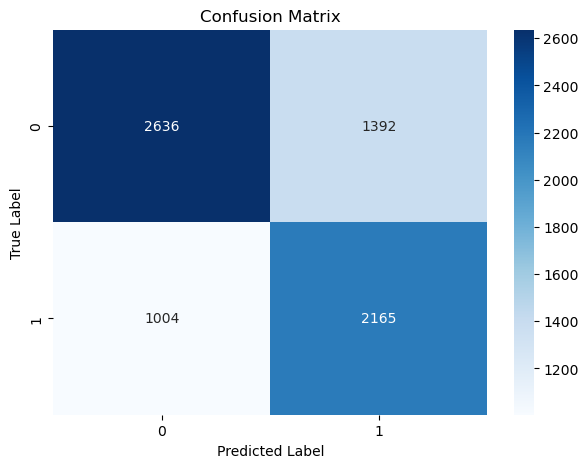

In [82]:
# Compute the confusion matrix 

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

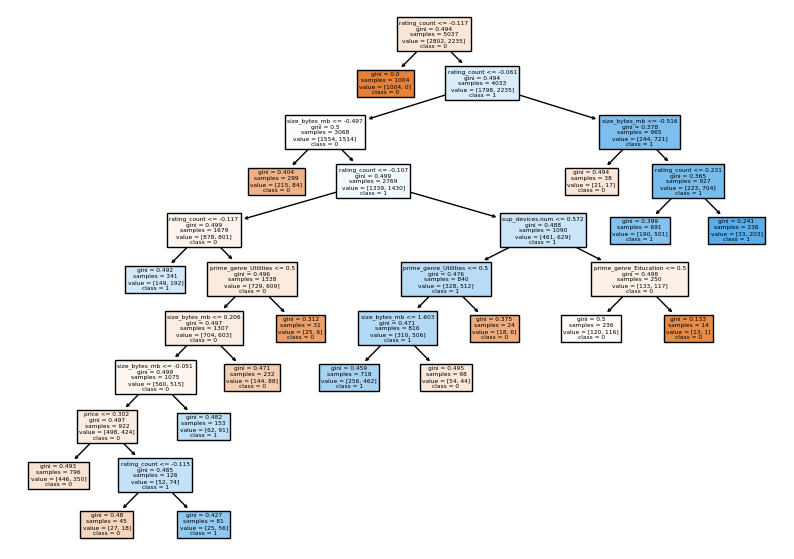

In [83]:
# Visualize the tree to inspect its size and complexity

plt.figure(figsize=(10,7))
class_names = [str(cls) for cls in pruned_tree.classes_]
plot_tree(pruned_tree, filled=True, feature_names=X.columns.tolist(), class_names=class_names)
plt.show()

The pruned tree is smaller in size and is less complex, which alleviates overfitting. 

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



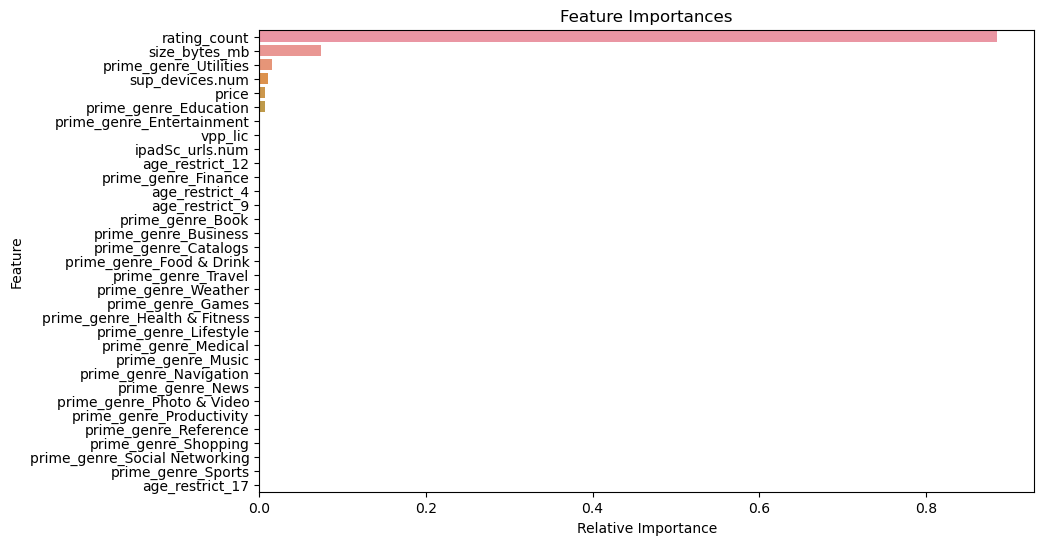

In [84]:
# Visualize feature importance 

features = X.columns
importances = pruned_tree.feature_importances_
indices = np.argsort(importances)

feature_importances_df = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))  
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

## 5.5 Decision Tree Model Conclusion

1. Model Performance Insights
- The pruned decision tree model has demonstrated a degree of predictive power with an accuracy score of approximately 0.678, which is an improvement from the preliminary model's accuracy of 0.644.
- The precision and recall values for each class show that the model is better at predicting non-high-rating apps (class 0) compared to high-rating apps (class 1). This is evident from the higher precision and recall scores for class 0.

2. Feature Importance Observations:
- The 'rating_count' feature has the highest importance, suggesting that the number of ratings an app receives is strongly indicative of its overall rating class. This could be interpreted as apps with more user engagement, in terms of rating count, tend to have more definitive feedback on quality.
- App 'size' and the presence in the 'Utilities' genre are also among the more significant features, indicating that the utility and size of an app play a role in its success.
- Surprisingly, price is not one of the top indicators for app rating success, which may imply that users do not necessarily associate cost with app quality.

# 6. Random Forest

## 6.1 Preliminary Random Forest

In [135]:
# Fit a preliminary random forest model to the data 

rf = RandomForestClassifier(n_estimators=90,
                           max_depth=10,
                           min_samples_split=5,
                           random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=90,
                       random_state=42)

In [136]:
# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation accuracy for each fold
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())
print("")
# Use cross_val_predict to make predictions on the whole dataset
y_pred = cross_val_predict(rf, X, y, cv=5)

# Print the classification report
print(classification_report(y, y_pred))

Cross-validation accuracy scores: [0.65416667 0.68194444 0.69979152 0.69631689 0.69214732]
Mean cross-validation accuracy: 0.6848733688518261

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      4028
           1       0.62      0.73      0.67      3169

    accuracy                           0.68      7197
   macro avg       0.69      0.69      0.68      7197
weighted avg       0.70      0.68      0.69      7197



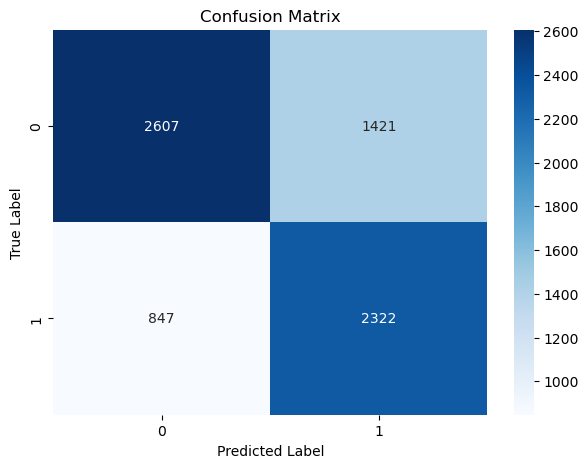

In [137]:
# Compute the confusion matrix

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



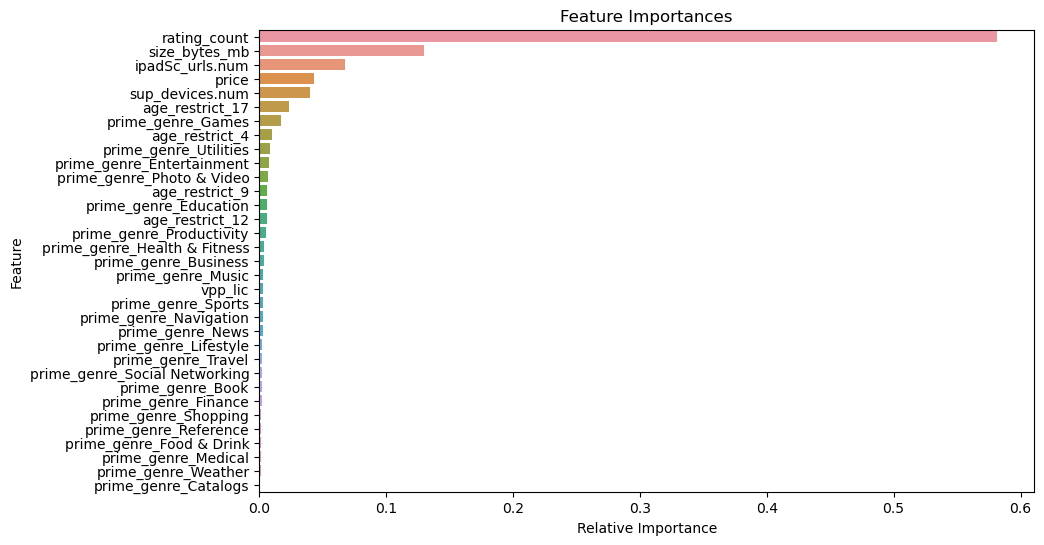

In [138]:
# Compute the feature importance 

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

feature_importances_df = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
})


# Visualize and compare feature importance  

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))  
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

## 6.2 Parameter Tuning 

In [149]:
##### Random Grid-Search with Cross-Validation

param_grid = {
    'n_estimators': [210,220,230,240],
    'max_depth': [10, 20 ,30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)


scorer = make_scorer(accuracy_score)


random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_grid, 
                                   n_iter=100, 
                                   scoring=scorer, 
                                   cv=5, verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_rf_random = random_search.best_estimator_

print(f"Best parameters (Randomized): {best_params_random}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters (Randomized): {'n_estimators': 210, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


## 6.3 Refined Random Forest

In [150]:
# Fit the refined random forest model to the dataset 

rf = RandomForestClassifier(n_estimators=210,
                            min_samples_split=5,
                            min_samples_leaf=1,
                            max_depth=10,
                           random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=210,
                       random_state=42)

In [151]:
# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation accuracy for each fold
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())
print("")
# Use cross_val_predict to make predictions on the whole dataset
y_pred = cross_val_predict(rf, X, y, cv=5)

# Print the classification report
print(classification_report(y, y_pred))

Cross-validation accuracy scores: [0.65972222 0.68263889 0.70257123 0.69909659 0.68450313]
Mean cross-validation accuracy: 0.6857064126322292

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      4028
           1       0.62      0.73      0.67      3169

    accuracy                           0.69      7197
   macro avg       0.69      0.69      0.69      7197
weighted avg       0.70      0.69      0.69      7197



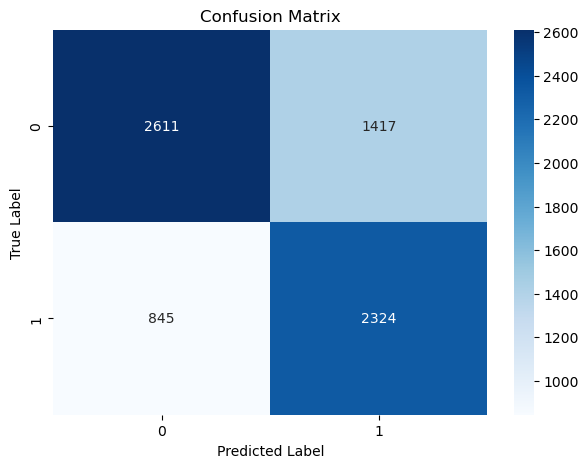

In [152]:
# Compute the confusion matrix 

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/HengJiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



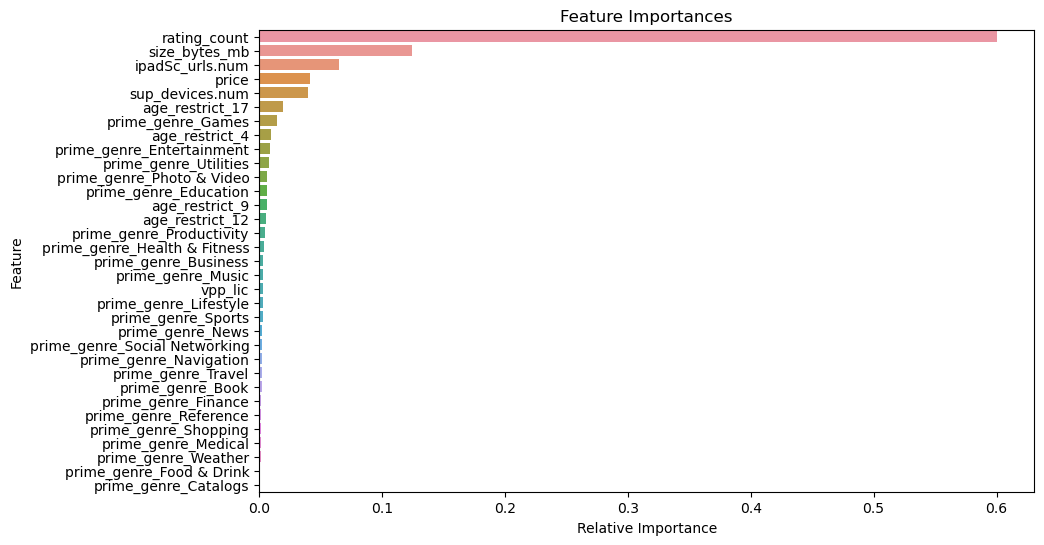

In [153]:
# Visualize feature importance

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

feature_importances_df = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))  
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

## 6.4 Refined Random Forest Conclusion

1. Model Performance
- Balanced Classification: The model shows a relatively balanced performance on both classes (high-rating and low-rating apps), as indicated by similar F1-scores for both classes. This suggests that the model is equally adept at identifying both high and low-rated apps.
- Precision and Recall: The model has a higher precision for class 0 (non-high-rating apps), meaning it is more reliable when it predicts an app is not high-rated. Conversely, it has a higher recall for class 1 (high-rating apps), indicating it is better at capturing the majority of high-rated apps at the cost of incorrectly labeling some low-rated apps as high-rated.
- Overall Accuracy: An accuracy score of approximately 0.686 shows the model has a good predictive power. However, there is still room for improvement, possibly through more advanced feature engineering or model ensembling.

2. Feature Importance 
- Rating Count: Similar to the decision tree model, the 'rating_count' feature is highly influential, reinforcing the idea that the number of ratings an app receives is a strong indicator of its perceived quality.
- App Size: The 'size_bytes_mb' feature also appears to be significant, which could imply that larger apps, potentially offering more content or features, are associated with higher ratings.
- Screenshots Displayed: The 'ipadSc_urls.num' feature, indicating the number of screenshots shown for display, is notably important. This could imply that visually demonstrating the app's features and interface could positively influence user perception even before download, or the developers of higher quality apps tend to showcase their products more comprehensively to users.
- Price: The significance of 'price' suggests that the cost of an app plays a role in user expectations and satisfaction. It may indicate that users weigh the value of an app's features against its price when rating it.
- Device Support: 'sup_devices.num' indicates that apps that support a broader range of devices may offer better compatibility and user experience, contributing to higher ratings.

## 6.5 Refined Random Forest with TFIDF Text Features

Limiting max_features to 300 helps to focus on the most relevant terms, and setting max_df to 0.5 helps to ignore terms that are too common across documents.

In [154]:
# Initialize and apply TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=300,max_df=0.5)  
X_tfidf = tfidf_vectorizer.fit_transform(df_apps['tokens_str']).toarray()

In [155]:
X_combined = np.hstack((X_tfidf, X))
X_combined

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16425761, 0.12319364, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [156]:
y = df_apps['high_rating'].values  

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

In [158]:
param_grid = {
    'n_estimators': [1600,1700,1800,1900],
    'max_depth': [10, 20 ,30, 40, 50,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)


scorer = make_scorer(accuracy_score)


random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_grid, 
                                   n_iter=100, 
                                   scoring=scorer, 
                                   cv=5, verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_rf_random = random_search.best_estimator_

print(f"Best parameters (Randomized): {best_params_random}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters (Randomized): {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50}


In [159]:
rf = RandomForestClassifier(n_estimators=1600, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            max_depth=50,
                            random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=1600, random_state=42)

In [161]:
# Perform cross-validation
cv_scores = cross_val_score(rf, X_combined, y, cv=5, scoring='accuracy')

# Print the cross-validation accuracy for each fold
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Use cross_val_predict to make predictions on the whole dataset
y_pred = cross_val_predict(rf, X_combined, y, cv=5)

# Print the classification report
print(classification_report(y, y_pred))

Cross-validation accuracy scores: [0.66180556 0.68888889 0.71507992 0.70882557 0.68936762]
Mean cross-validation accuracy: 0.692793510153656
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      4028
           1       0.63      0.71      0.67      3169

    accuracy                           0.69      7197
   macro avg       0.69      0.70      0.69      7197
weighted avg       0.70      0.69      0.69      7197



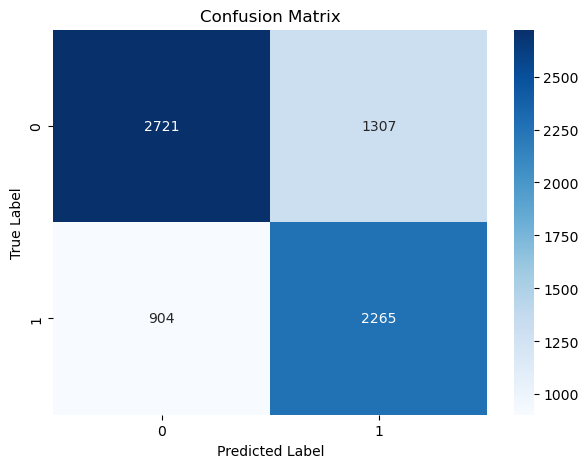

In [162]:
# Compute the confusion matrix 

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 6.5 Refined Random Forest with TFIDF Text Features Conclusion

1. Model Performance
- Integrating TFIDF vectors from app descriptions could provide additional context that numerical and categorical data alone may not capture, as seen from the slight improvement in accuracy when textual features are included.
- The Random Forest classifier, trained on a combination of TF-IDF vectorized text data and other app features, achieved a mean cross-validation accuracy of approximately 0.693. This suggests the model is reasonably predictive of the outcome, though there may still be room for improvement.
- The precision for class 0 (non-high-rating apps) is higher than for class 1 (high-rating apps), indicating the model is more reliable when predicting apps that are not high-rated. Conversely, the recall for class 1 is higher than for class 0, which means the model is better at capturing the majority of the high-rated apps. This could be reflective of the model’s ability to identify true high-rated apps, but it may also misclassify some non-high-rated apps as high-rated.

2. Potential Next-Steps
- Hyperparameter Tuning: Further tuning the hyperparameters of the Random Forest model, as well as the TF-IDF vectorization parameters, could lead to additional improvements. Due to limitations on computational power, a randomized search was performed instead of a more comprehensive grid search, which could systematically explore a range of values to find the most effective combination.
- Feature Engineering: Additional feature engineering, especially around the textual data, might yield better model performance. Experimenting with different settings for the TF-IDF vectorizer or using alternative text representation methods like word embeddings could provide richer information for the model.

